<font size=7>LFP Animations

# <font color="grey"> Imports

In [1]:
# Basic Imports
import numpy as np
import matplotlib.pyplot as plt

# Ash's animation imports
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import scipy.interpolate
import math

# My imports
import pickle
from human_hip.lfp import butter_filter, get_brain_waves
from human_hip.spike_data import raster_fancy_plot, read_phy_files
import  braingeneers.data.datasets_electrophysiology as ephys

# <font color="orange"> DG Biculline Animation

## <font color="orange"> Get Data

load raw data

In [29]:
# load raw data
file = open('/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/D_start5s_stop15s_fs1ms.pkl', 'rb')
data_pkl = pickle.load(file)
file.close()

process data

In [30]:
x = data_pkl['xy'][:,1]                                             # x and y  coordinates
y = data_pkl['xy'][:,0]*-1
waves = get_brain_waves( data_pkl["data"], data_pkl["frame_rate"] ) # get common brain waves

basic plots

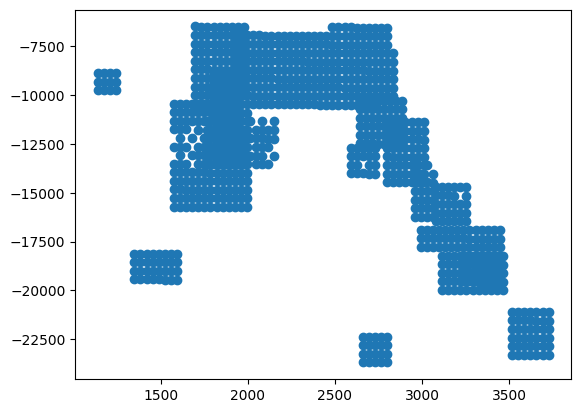

In [31]:
# plot electrode layout
plt.scatter( x , y )

0


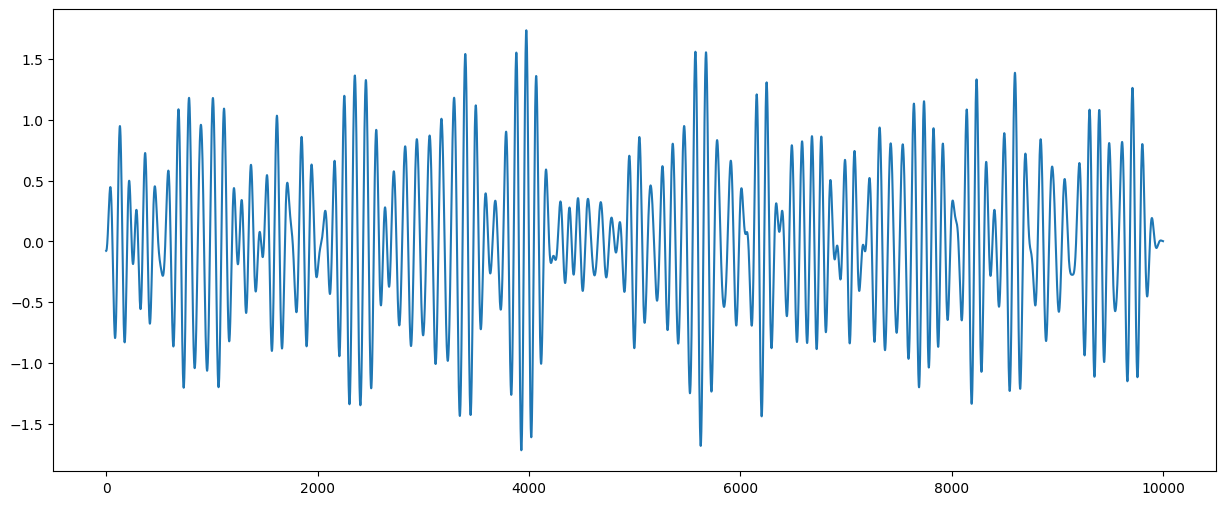

100


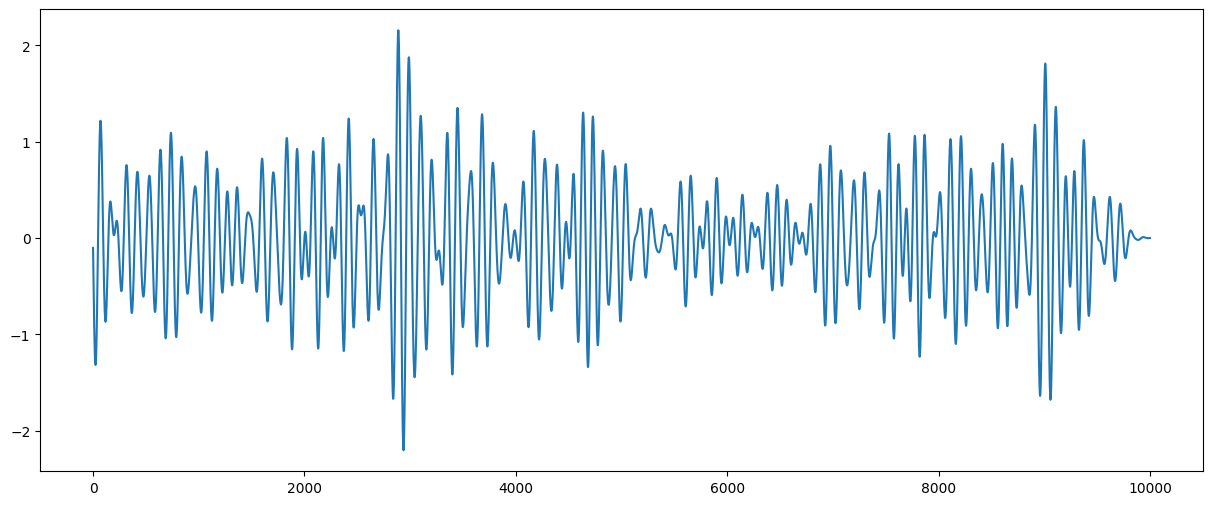

200


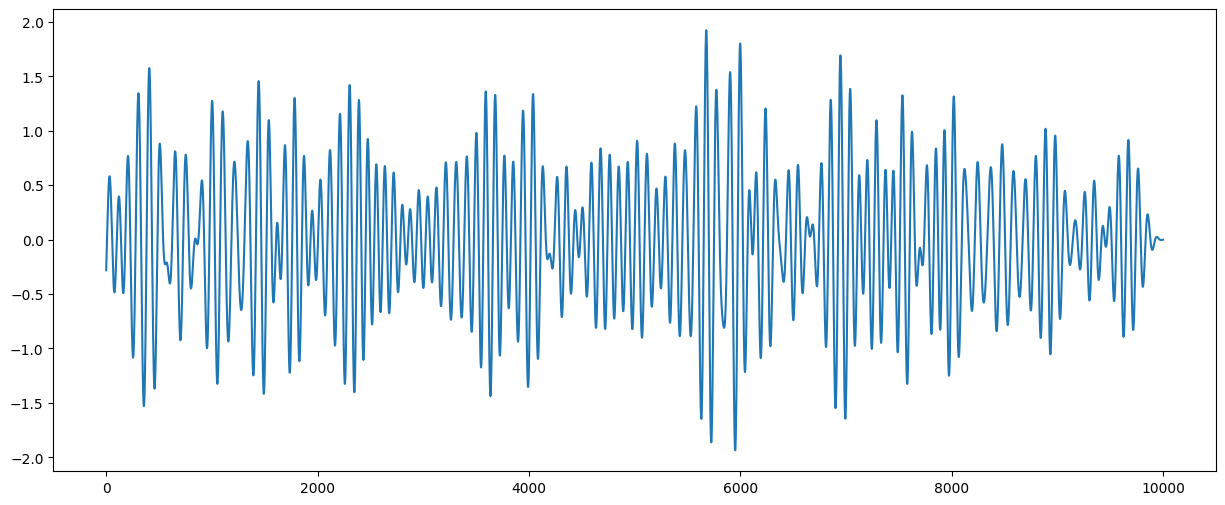

300


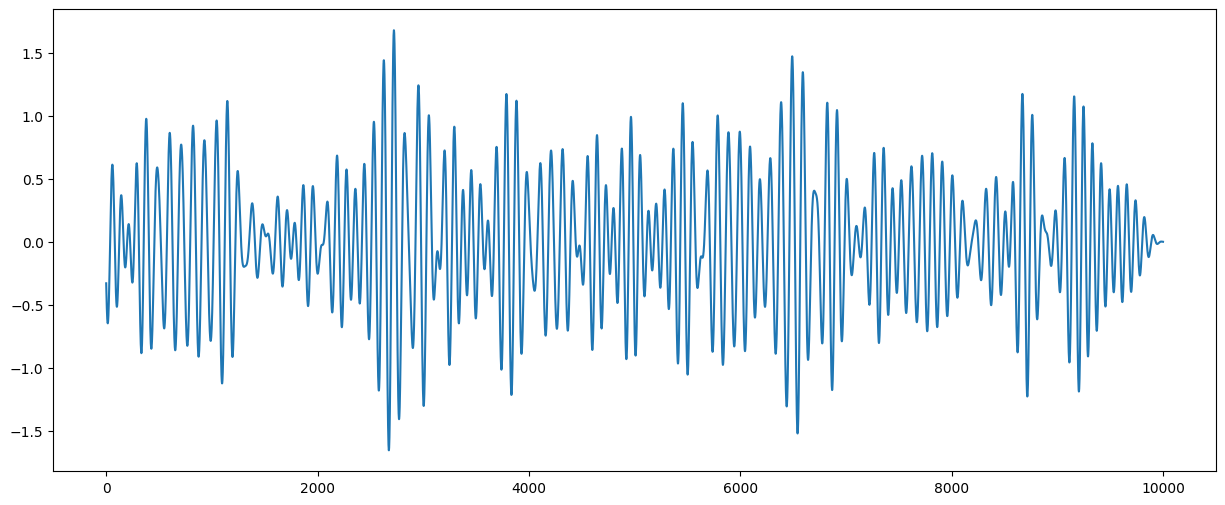

400


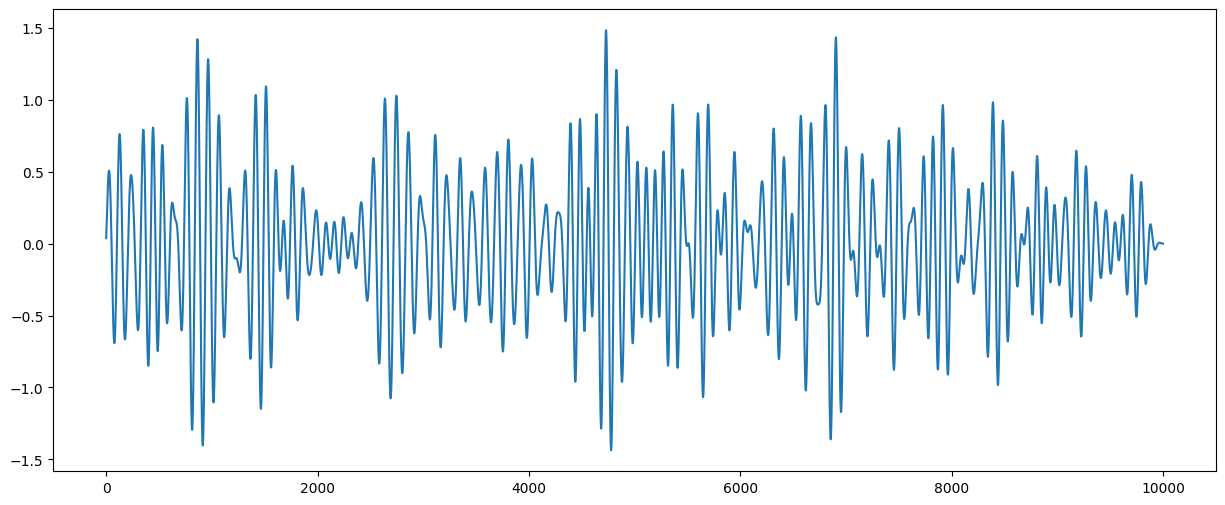

500


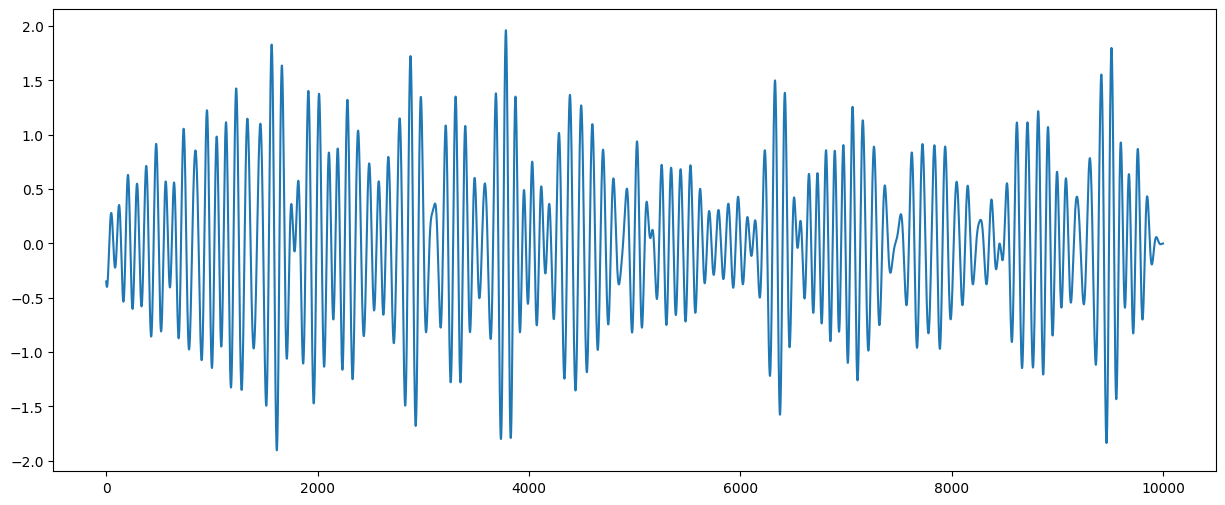

600


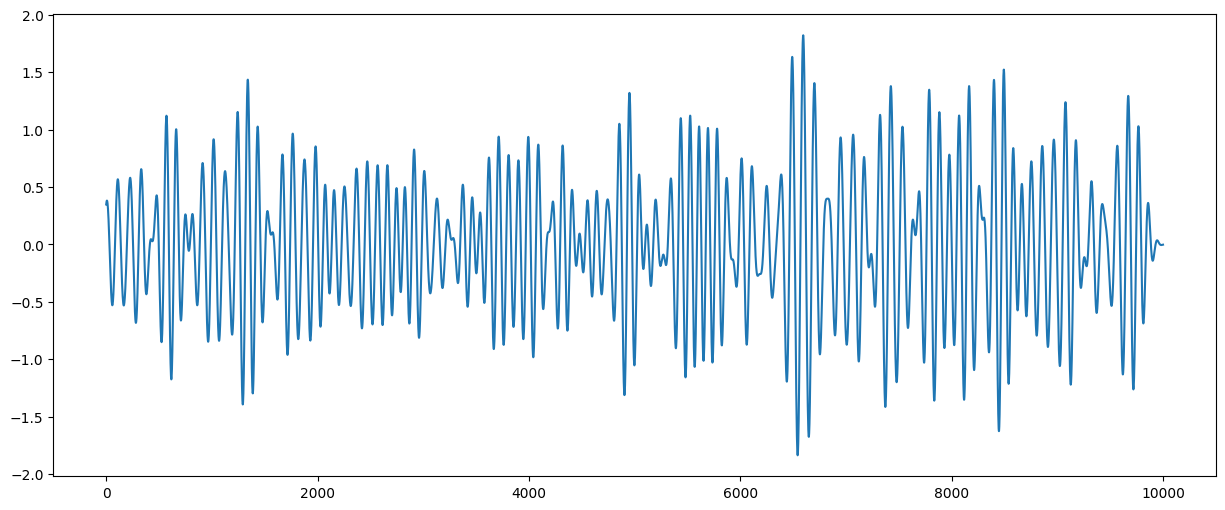

700


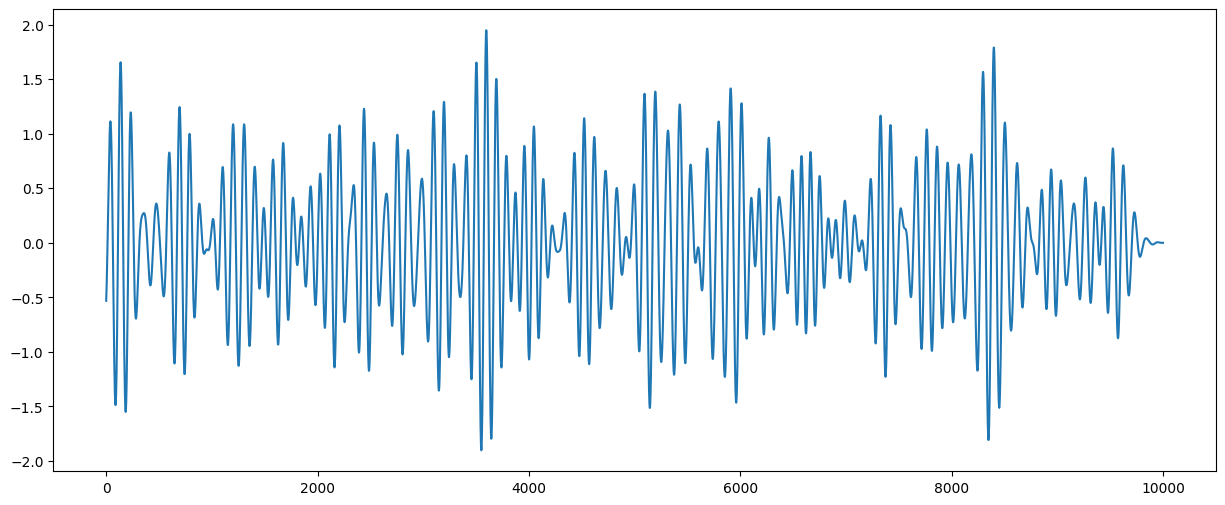

800


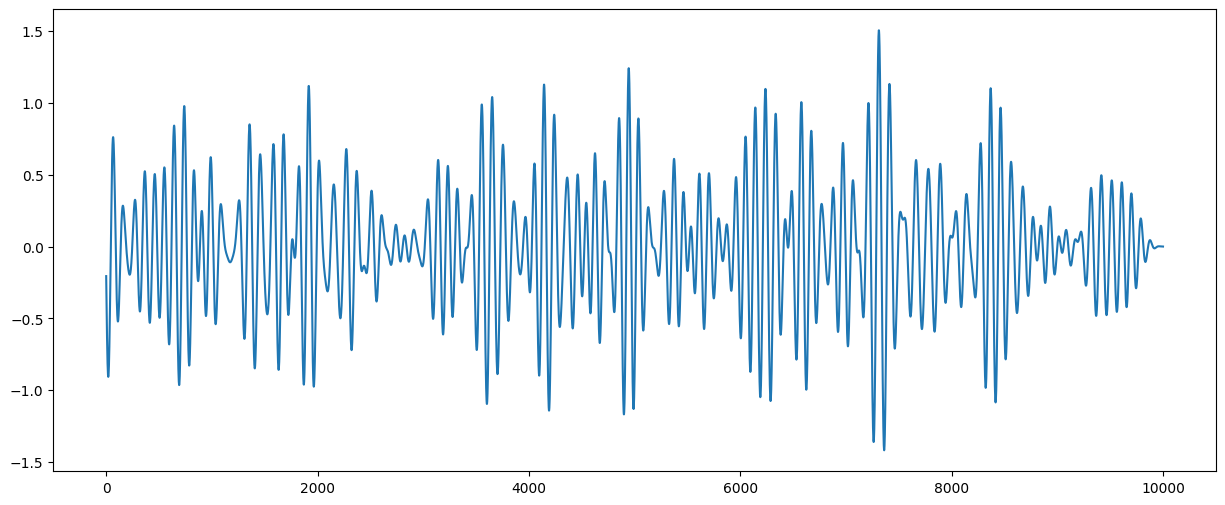

In [32]:
# plot scatter of one wave from data
for i in range(0,900,100):
    print(i)
    plt.figure(figsize=(15,6))
    plt.plot( [*range(waves["basic"].shape[1])], waves["alpha"][i,:] )
    plt.show()

## <font color="orange"> Make Animation

[useful example](https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

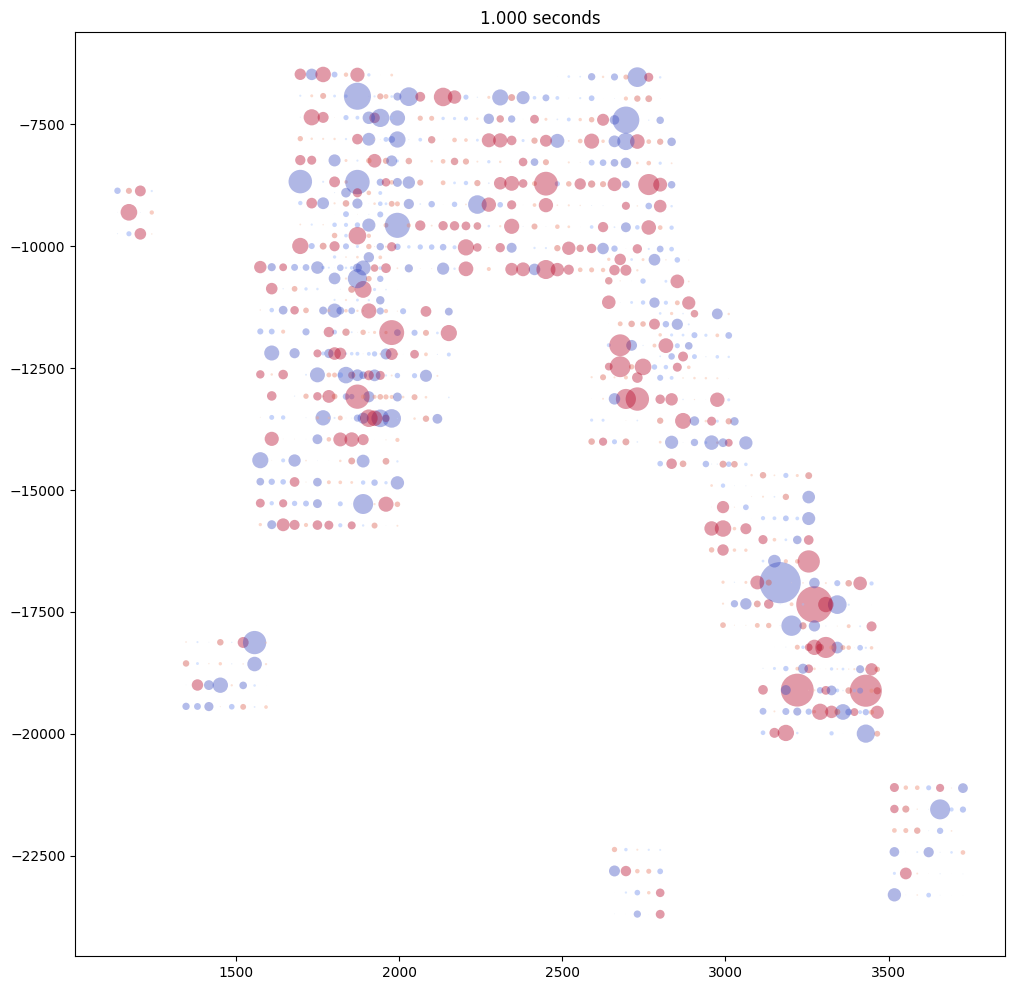

In [33]:
## Alpha Animation
# dg_bic_alpha_start1000_stop2000_step1
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
data = waves["alpha"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    scatter._sizes = (np.abs(data[:,i])**2.3)*80
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(1000, 2000, 3), interval=100, blit=False) 

In [34]:
anim.save("checkit3.mp4")

## <font color="green"> Saved Animations

In [ ]:
## Alpha Animation
# dg_bic_alpha_start1000_stop2000_step1
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
data = waves["alpha"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    scatter._sizes = (np.abs(data[:,i])**2.3)*80
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(1000, 2000, 3), interval=100, blit=False) 

## <font color="brown"> Heatmap

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
data = waves["delta"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, alpha=.3, s=100, edgecolor='none' ) #c=data,

# animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(2000, 4000, 14), interval=100, blit=False)

### <font color="brown"> Example

[website here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html)

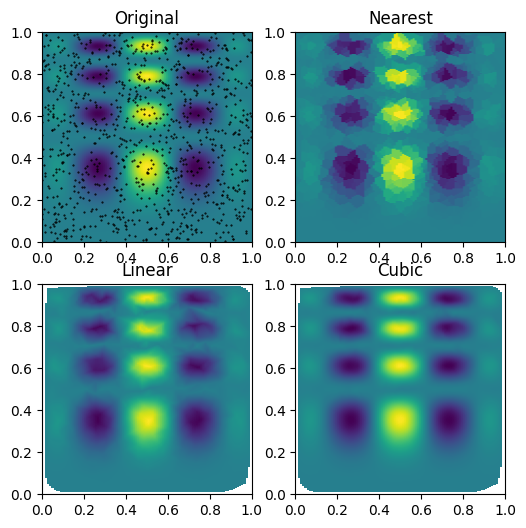

In [187]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

### <font color="brown"> Try 1

In [217]:

values = data_pkl["data"][:,0]

In [234]:
x = data_pkl['xy'][:,1]                                             # x and y  coordinates
y = data_pkl['xy'][:,0]*-1
points = np.array( [x,y] ).T   #points= data_pkl["xy"]

grid_x, grid_y = np.mgrid[ math.floor(min(x)):math.ceil(max(x)):10 , math.floor(min(y)):math.ceil(max(y)):10 ]
#grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

In [241]:
grid_z2 = griddata(points, values, (grid_x, grid_y), method="nearest") #"linear" #"nearest")#'cubic')


Text(0.5, 1.0, 'Cubic')

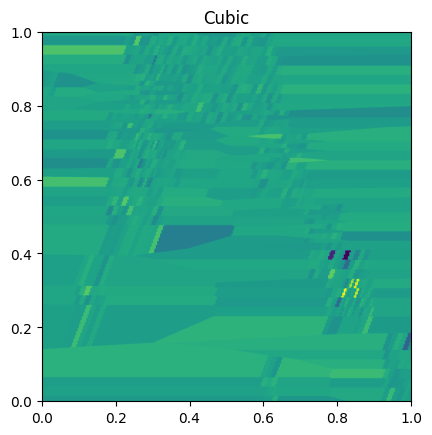

In [243]:
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')

In [ ]:
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

# <font color="red">?Bad?</font> <font color="magenta"> DG No-Bicuculine Animation

## <font color="magenta"> Get Data

load data

In [2]:
# load raw data
file = open('/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/immediate_start325s_stop335s_fs1ms.pkl', 'rb')
data_pkl = pickle.load(file)
file.close()

process data

In [3]:
x = data_pkl['xy'][:,1]                                             # x and y  coordinates
y = data_pkl['xy'][:,0]*-1
waves = get_brain_waves( data_pkl["data"], data_pkl["frame_rate"] ) # get common brain waves

basic plots

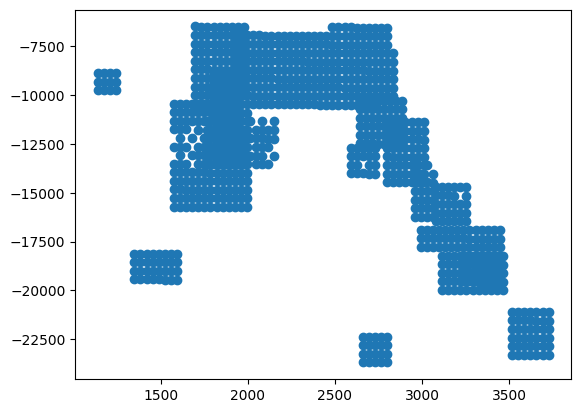

In [4]:
# plot electrode layout
plt.scatter( x , y )

0


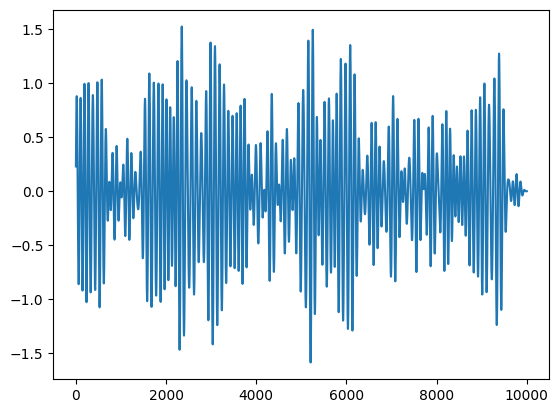

100


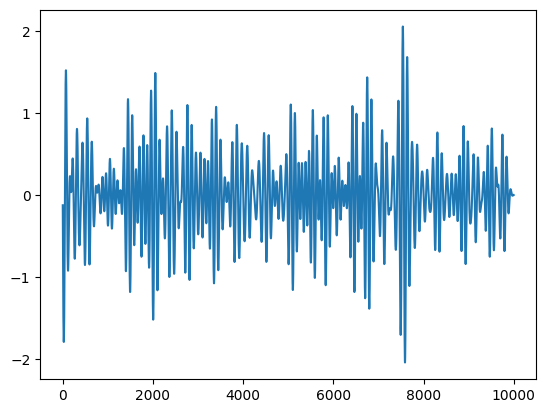

200


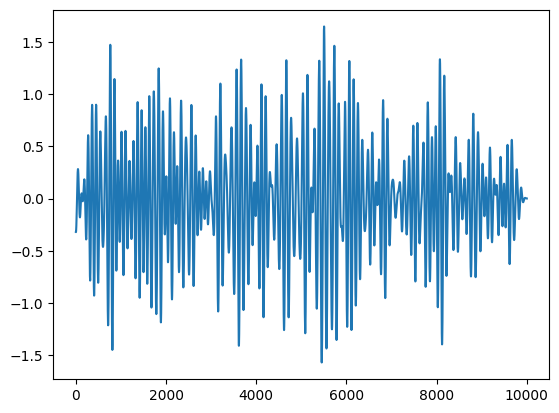

300


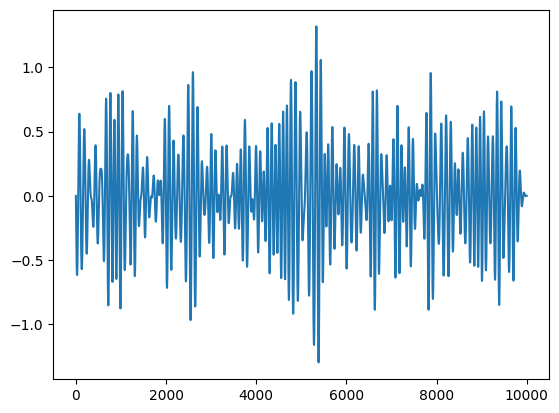

400


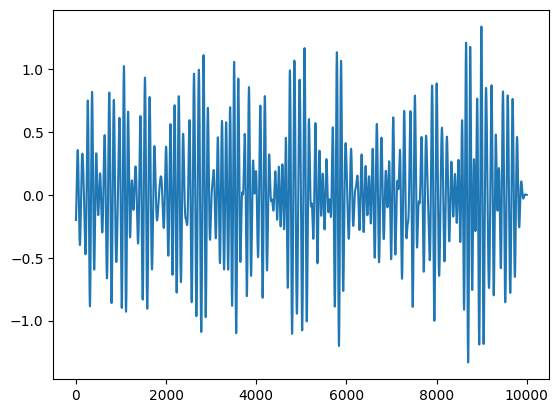

500


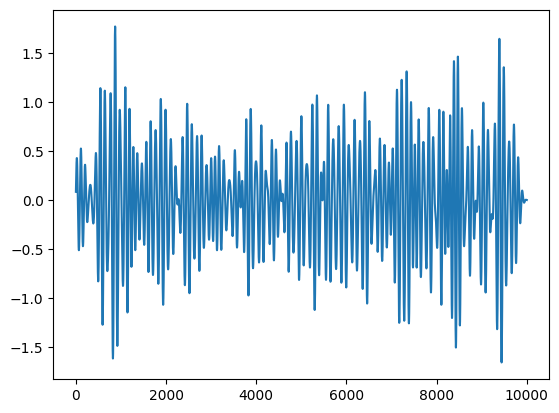

600


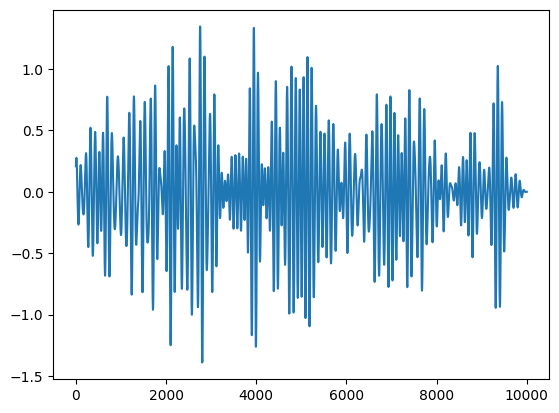

700


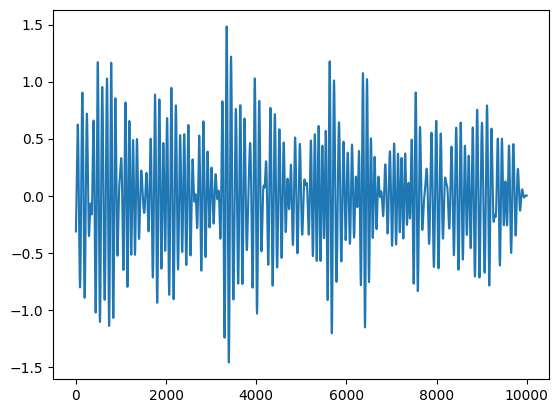

800


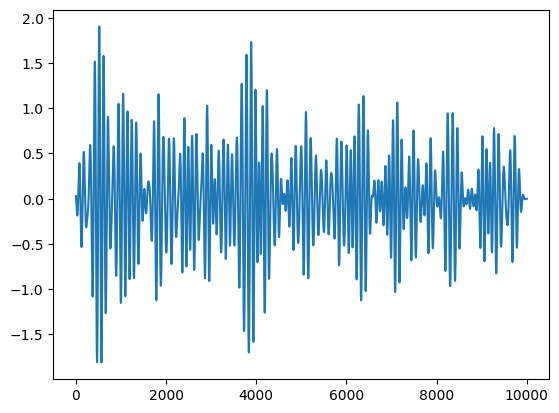

In [12]:
# plot scatter of one wave from data
for i in range(0,900,100):
    print(i)
    plt.plot( [*range(waves["basic"].shape[1])], waves["alpha"][i,:] )
    plt.show()
    #plt.xlim(2000,3000)

## <font color="magenta"> Make Animation

[useful example](https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

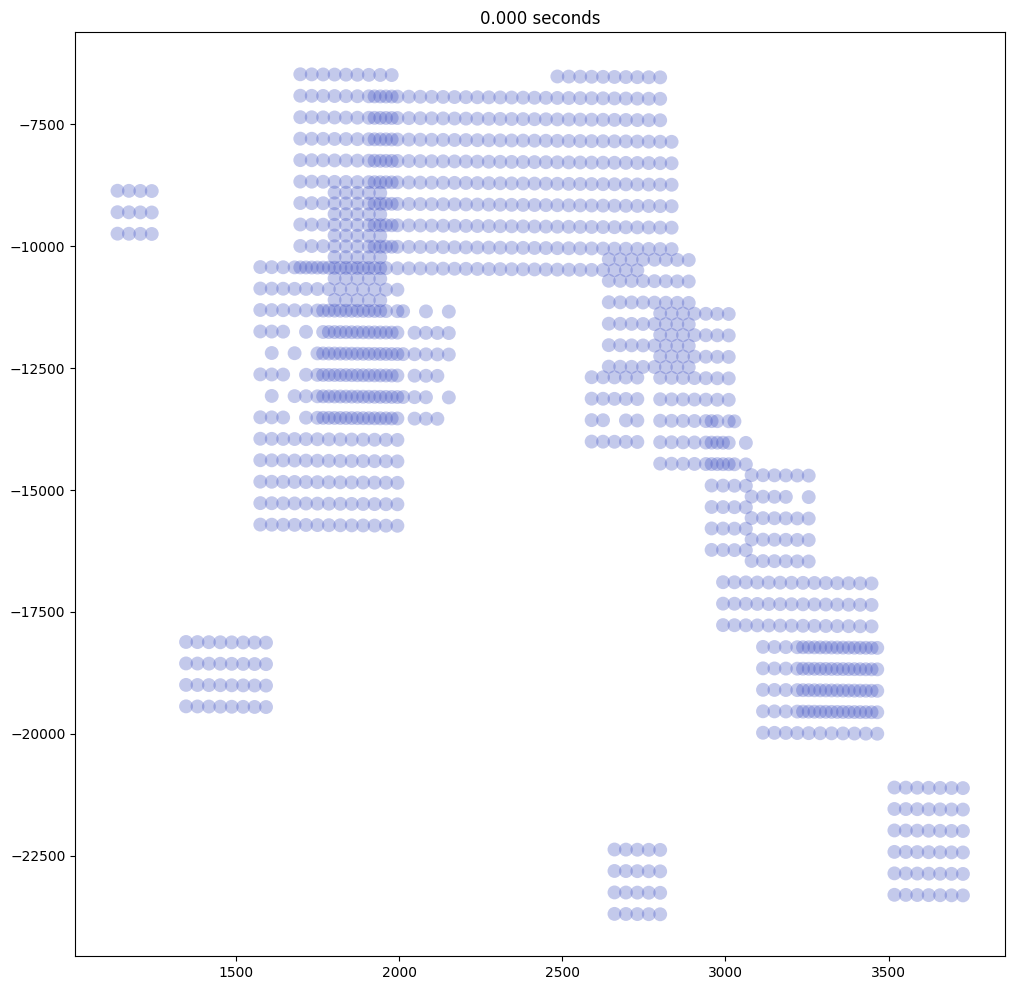

In [179]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
data = waves["low"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, alpha=.3, s=100, edgecolor='none' ) #c=data,

# animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(0000, 6000, 50), interval=100, blit=False)

In [180]:
anim.save("checkit4.mp4")

# <font color="green">?Good?</font> <font color="magenta"> DG No-Bicuculine Animation

## <font color="magenta"> Get Data

load data

In [13]:
# load raw data
file = open('/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/immediate_start34s_stop44s_fs1ms.pkl', 'rb')
data_pkl = pickle.load(file)
file.close()

process data

In [18]:
x = data_pkl['xy'][:,0]                                             # x and y  coordinates
y = data_pkl['xy'][:,1]
waves = get_brain_waves( data_pkl["data"], data_pkl["frame_rate"] ) # get common brain waves

basic plots

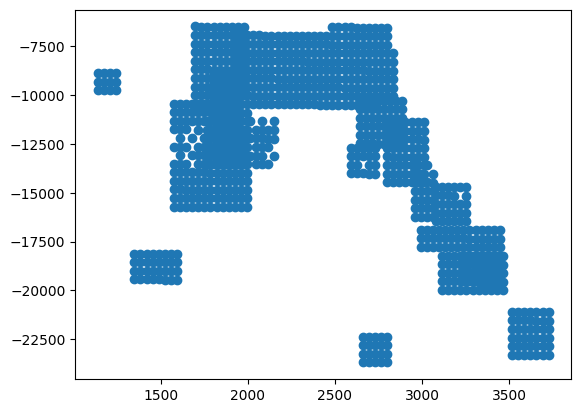

In [19]:
# plot electrode layout
plt.scatter( x , y )

0


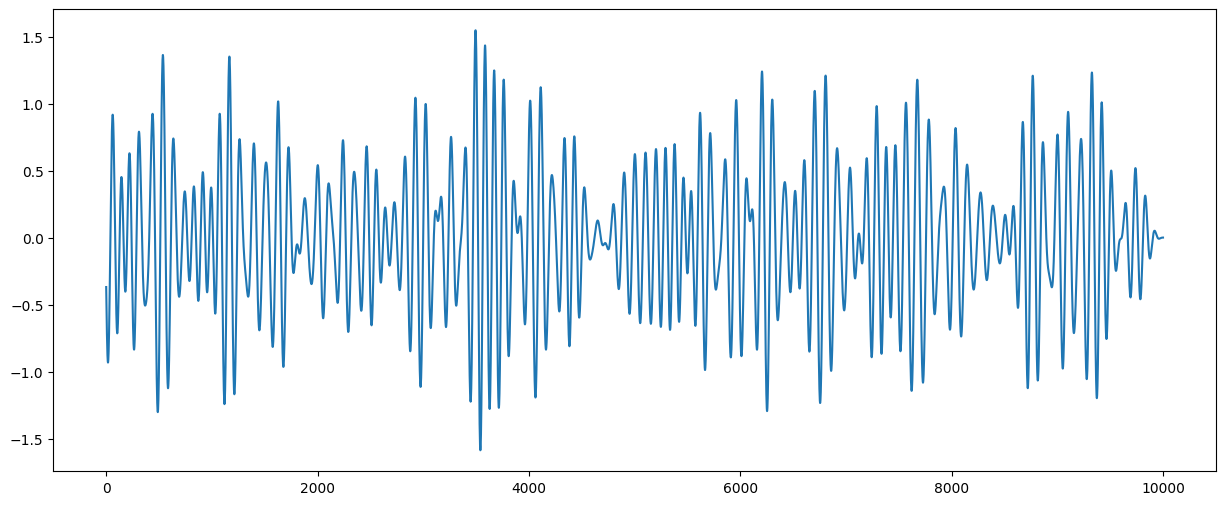

100


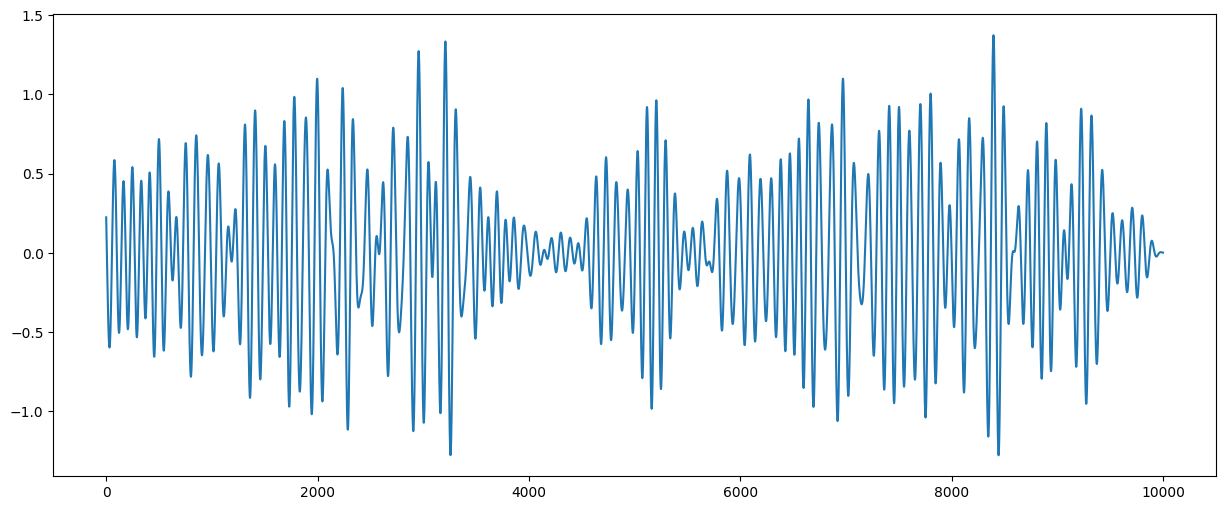

200


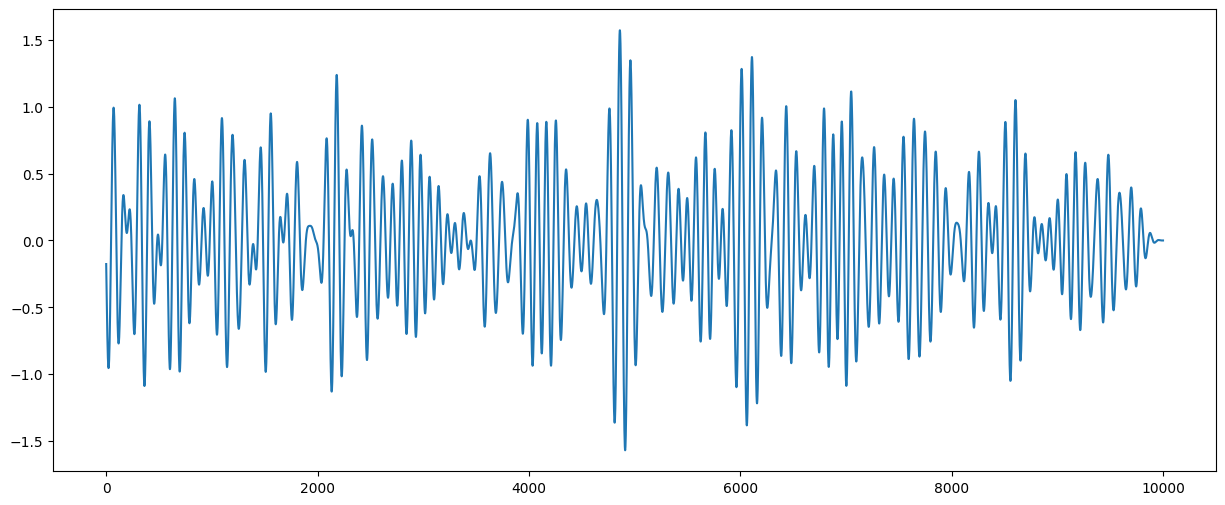

300


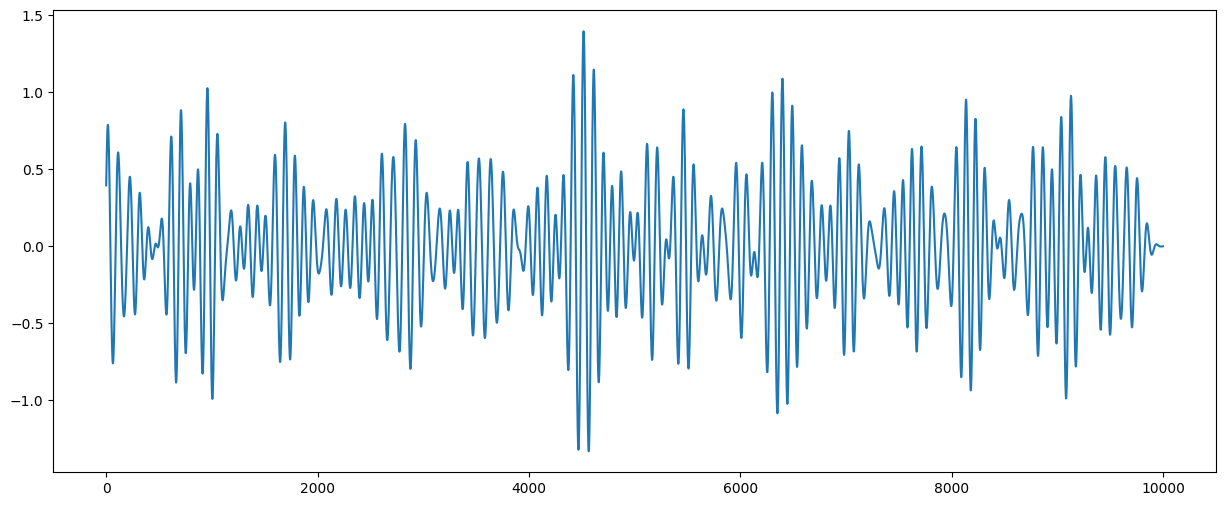

400


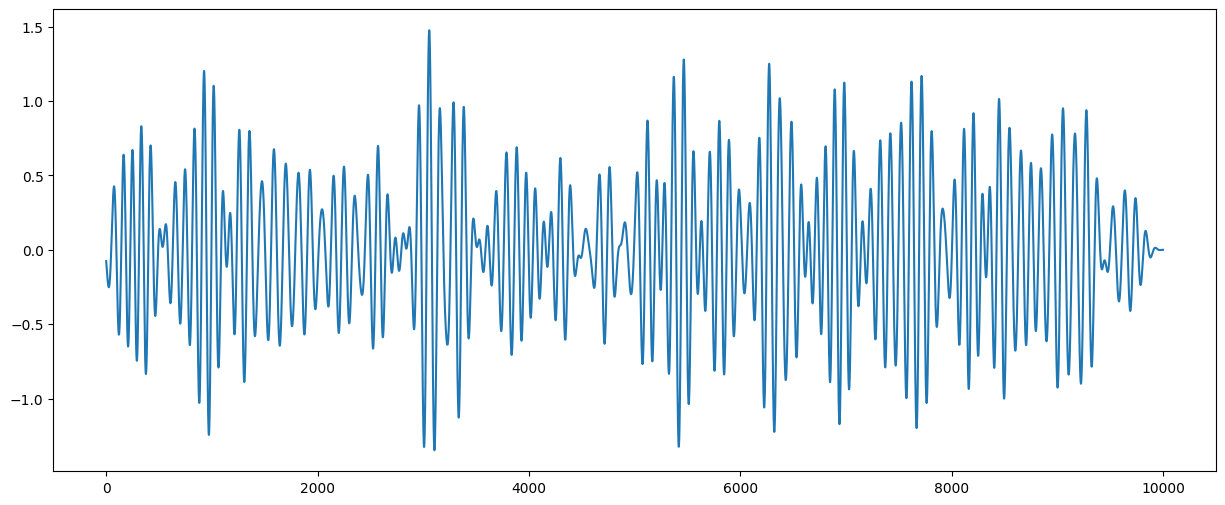

500


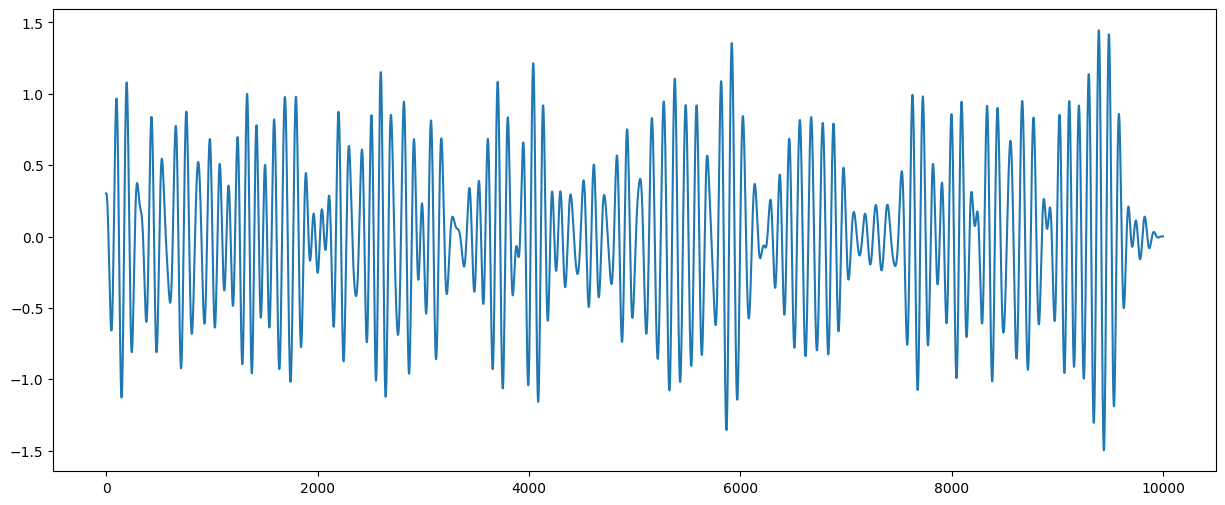

600


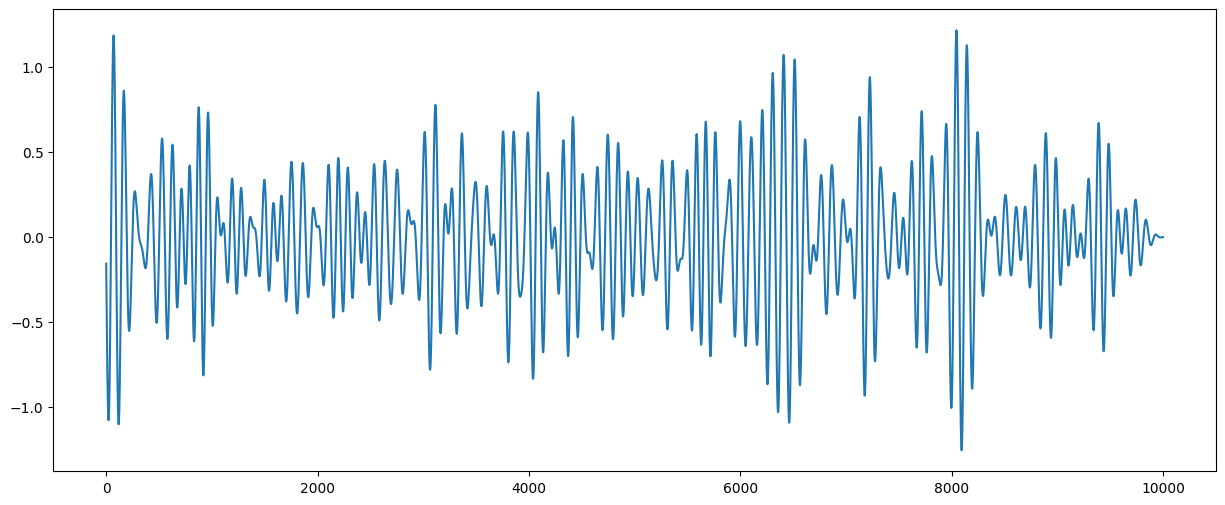

700


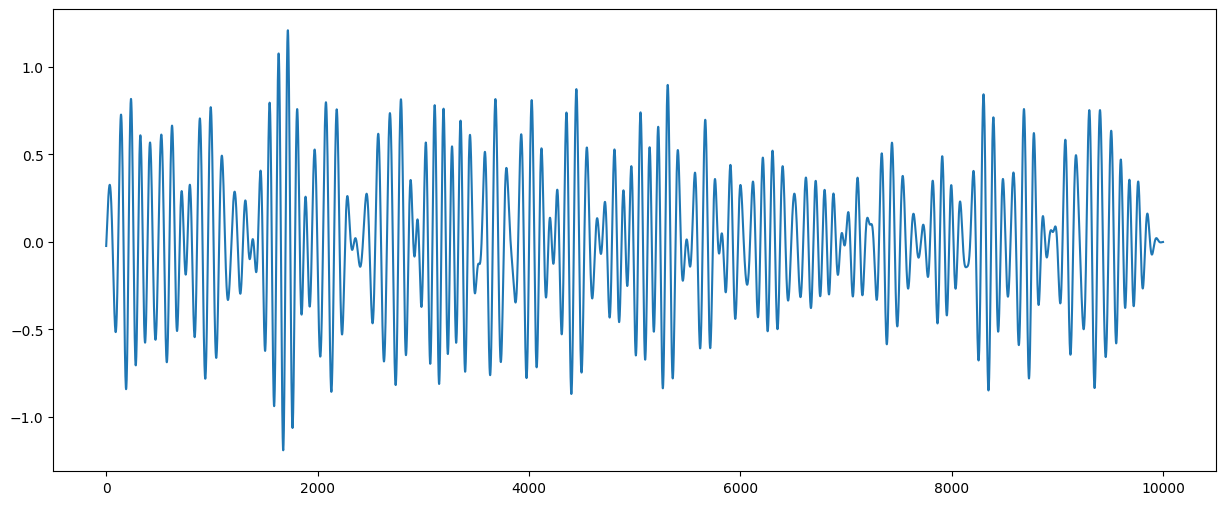

800


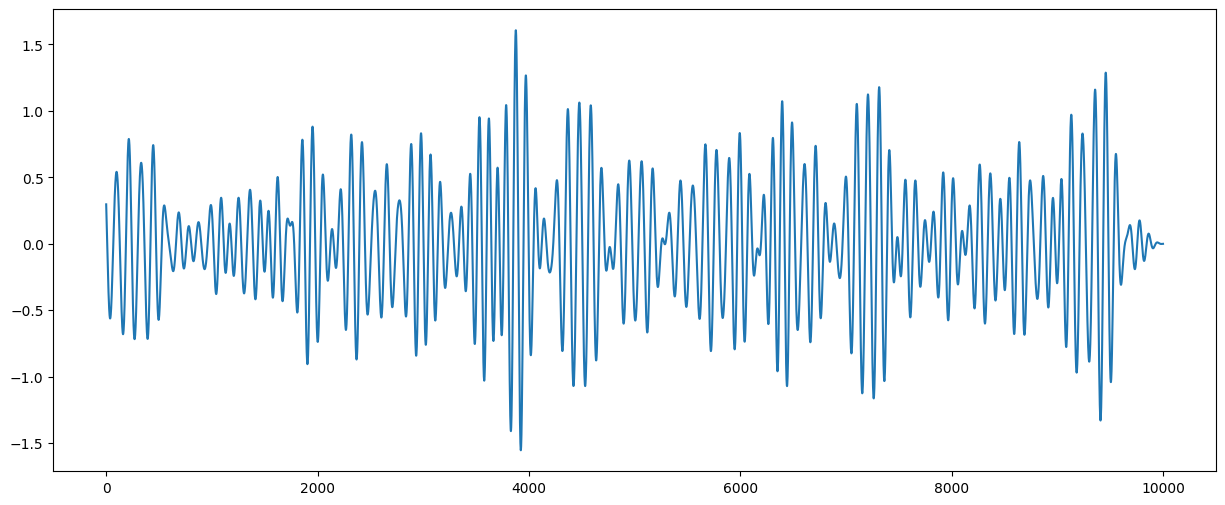

In [24]:
# plot scatter of one wave from data
for i in range(0,900,100):
    print(i)
    plt.figure(figsize=(15,6))
    plt.plot( [*range(waves["basic"].shape[1])], waves["alpha"][i,:] )
    plt.show()
    #plt.xlim(2000,3000)

## <font color="magenta"> Make Animation

[useful example](https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

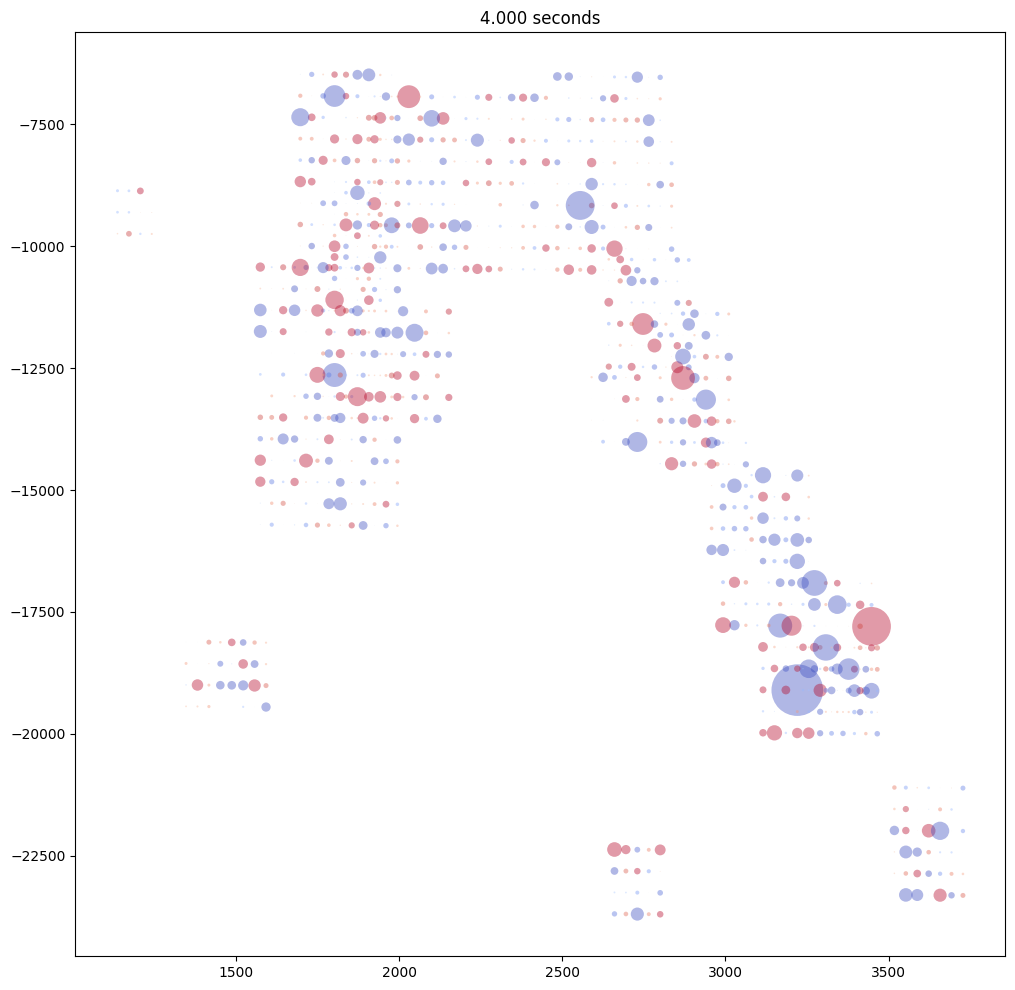

In [27]:
## Long Alpha Animation
# dg_alpha_start4000_stop6000_step1
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
data = waves["alpha"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    scatter._sizes = (np.abs(data[:,i])**2.3)*80
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(4000, 6000, 3), interval=100, blit=False) 

In [28]:
anim.save("checkit4.mp4")

## <font color="green"> Saved Animations

# <font color="red">BAD-</font> <font color="blue"> CA1 Animation

## <font color="blue"> Get Data

load data

In [2]:
# load raw data
file = open('/workspaces/human_hippocampus/data/ephys_raw/2023-04-02-e-hc328_unperturbed/raw_start0s_stop20s_downsampled40frames.pkl', 'rb')
data_pkl = pickle.load(file)
file.close()

process data

In [3]:
x = data_pkl['xy'][:,1]                                             # x and y  coordinates
y = data_pkl['xy'][:,0]*-1
waves = get_brain_waves( data_pkl["data"], data_pkl["frame_rate"] ) # get common brain waves

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

basic plots

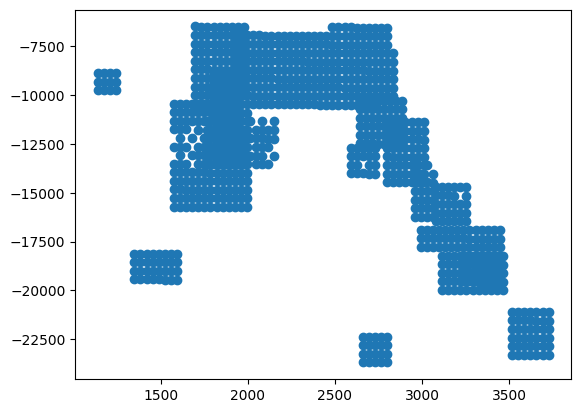

In [ ]:
# plot electrode layout
plt.scatter( x , y )

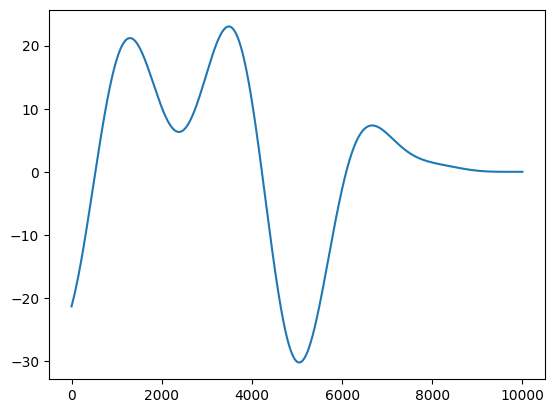

In [ ]:
# plot scatter of one wave from data
plt.plot( [*range(waves["basic"].shape[1])], waves["low"][990,:] )
#plt.xlim(2000,3000)

## <font color="blue"> Make Animation

[useful example](https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

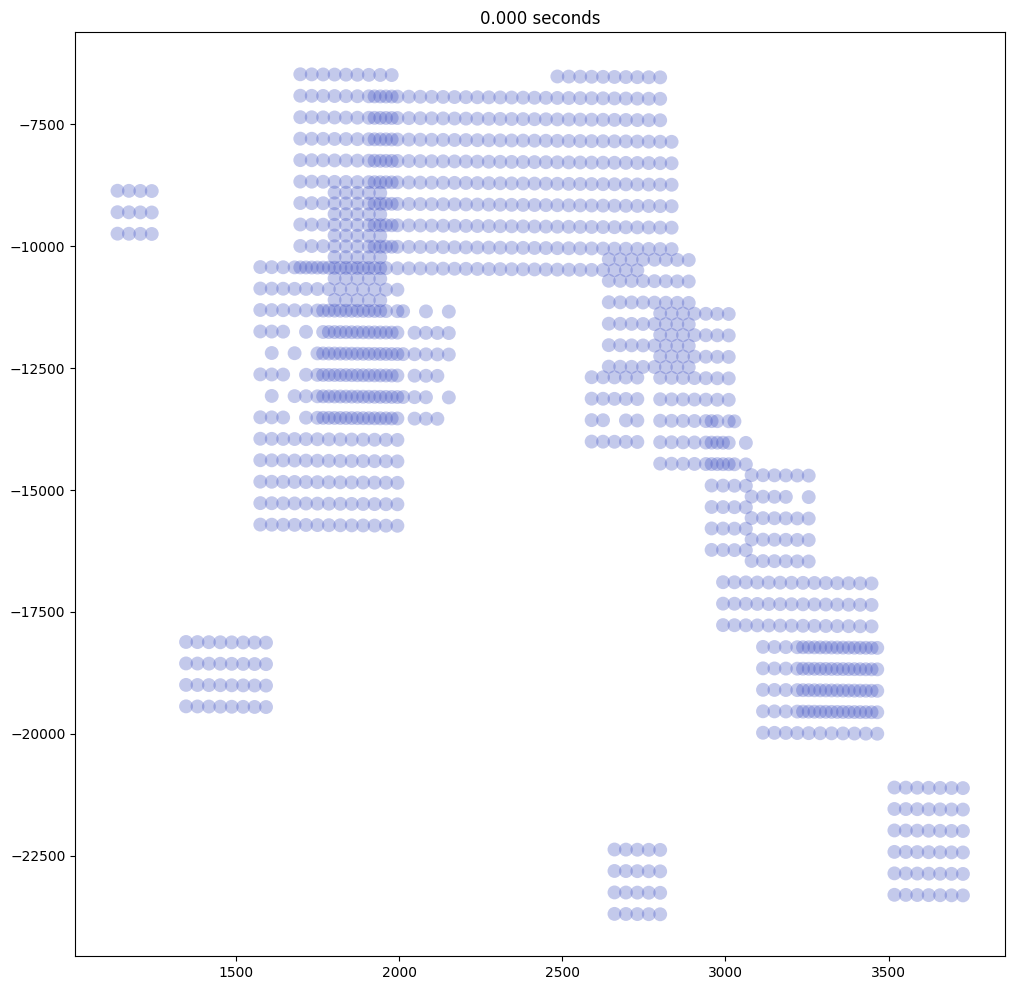

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
data = waves["low"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, alpha=.3, s=100, edgecolor='none' ) #c=data,

# animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(0000, 6000, 50), interval=100, blit=False)

In [ ]:
anim.save("checkit4.mp4")

# <font color="green">?Good?</font> <font color="blue"> CA1 Animation

## <font color="blue"> Look at raster data

In [2]:
sd = read_phy_files('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip')


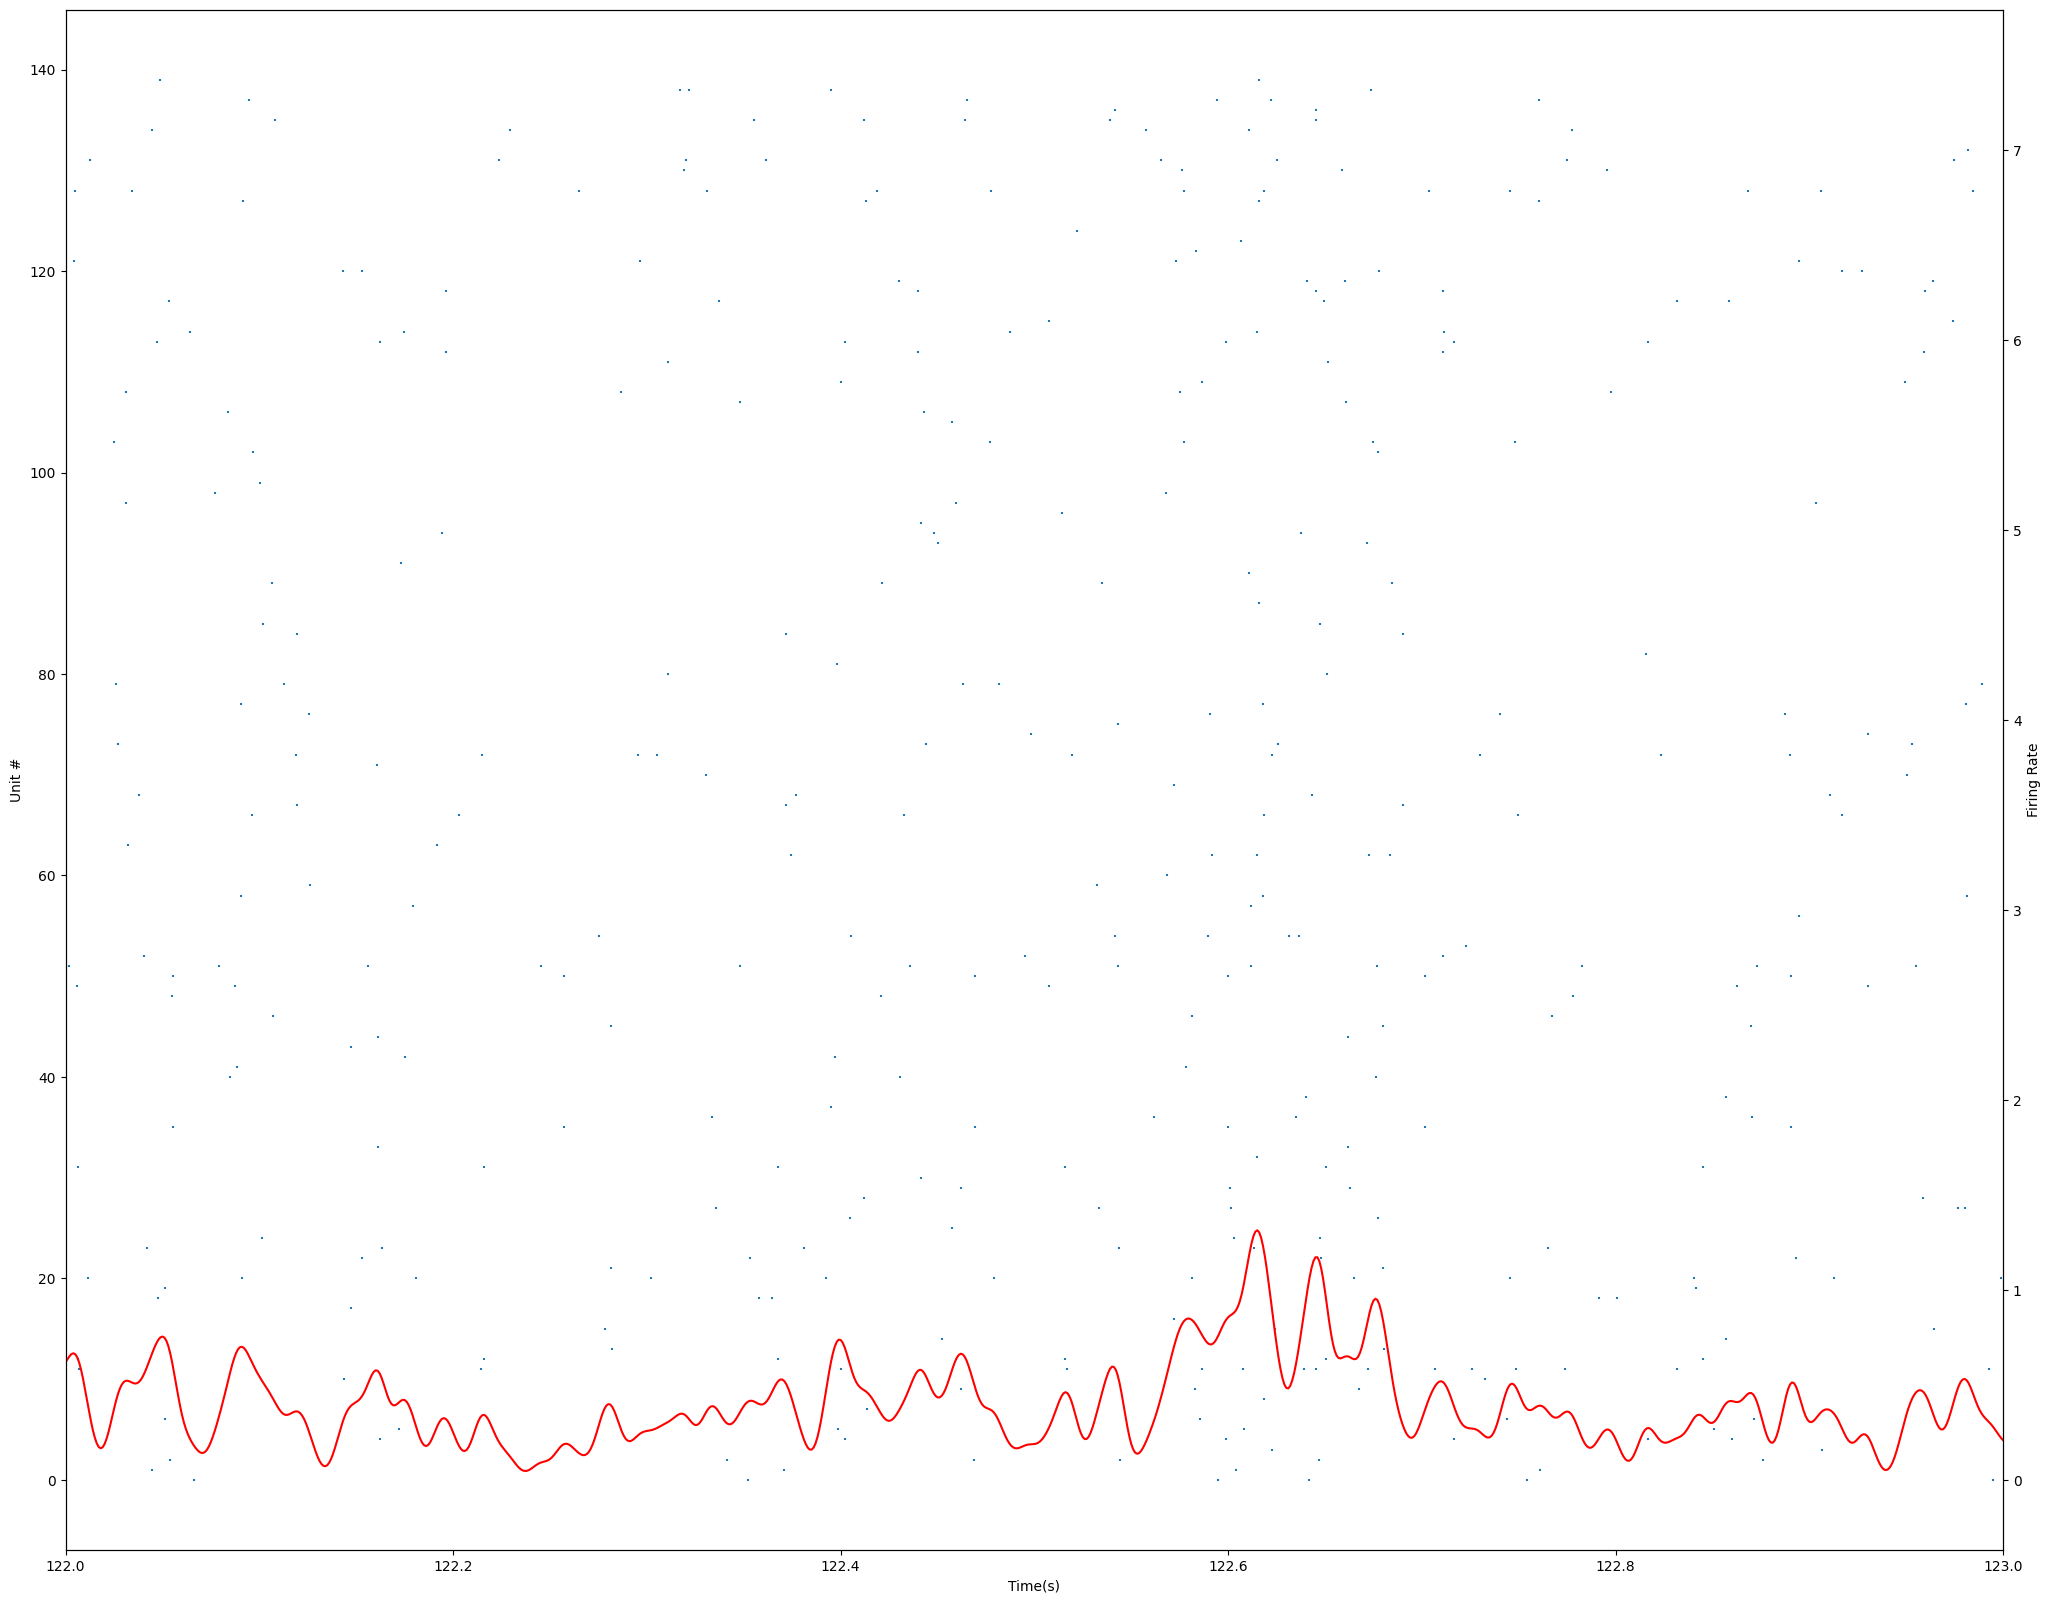

In [6]:
raster_fancy_plot(sd, xsize=25, ysize=20, start_time=122, stop_time=123)

## <font color="blue"> Get Data

load data

In [3]:
# load raw data
file = open("/workspaces/human_hippocampus/data/ephys_raw/2023-04-02-e-hc328_unperturbed/raw_start120s_stop130s_fs1ms.pkl", 'rb')
data_pkl = pickle.load(file)
file.close()

process data

In [4]:
x = data_pkl['xy'][:,0]                                             # x and y  coordinates
y = data_pkl['xy'][:,1]
waves = get_brain_waves( data_pkl["data"], data_pkl["frame_rate"] ) # get common brain waves

basic plots

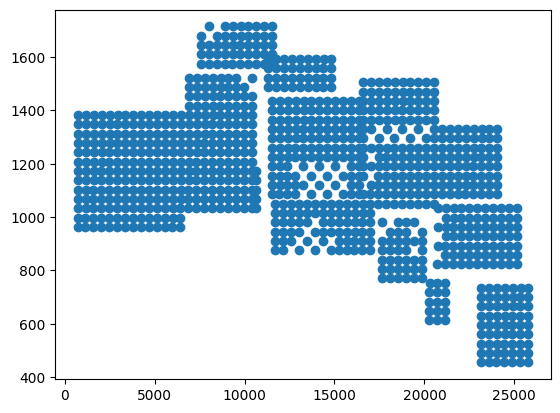

In [5]:
# plot electrode layout
plt.scatter( x , y )

(972, 10000)
0


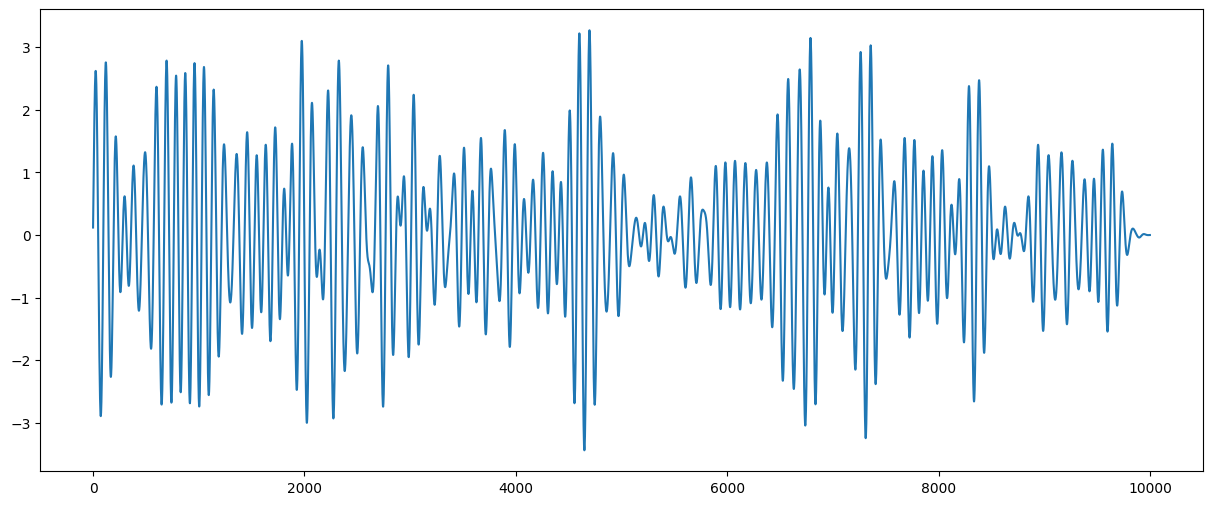

100


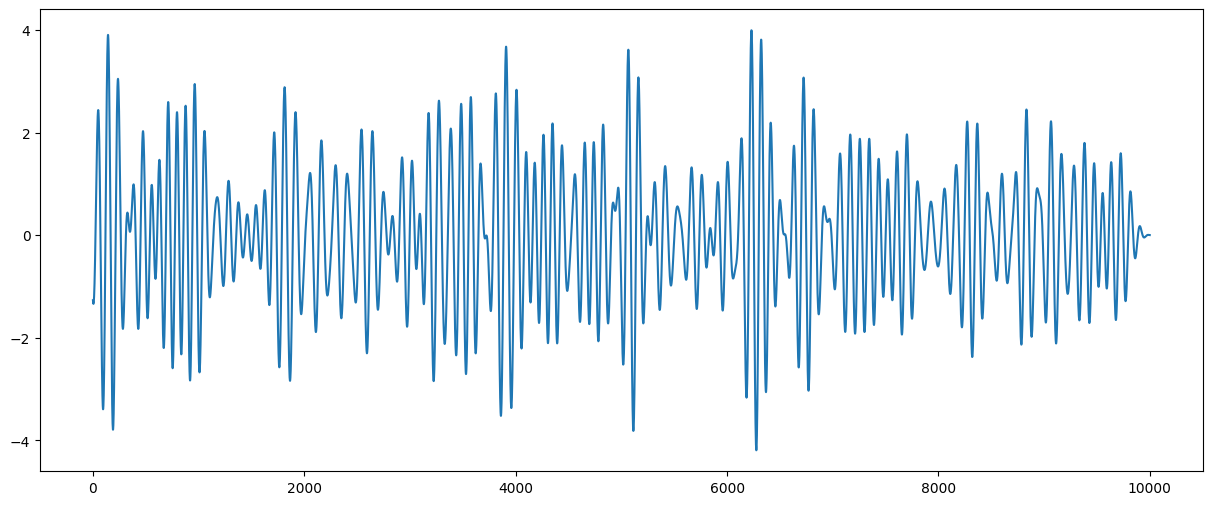

200


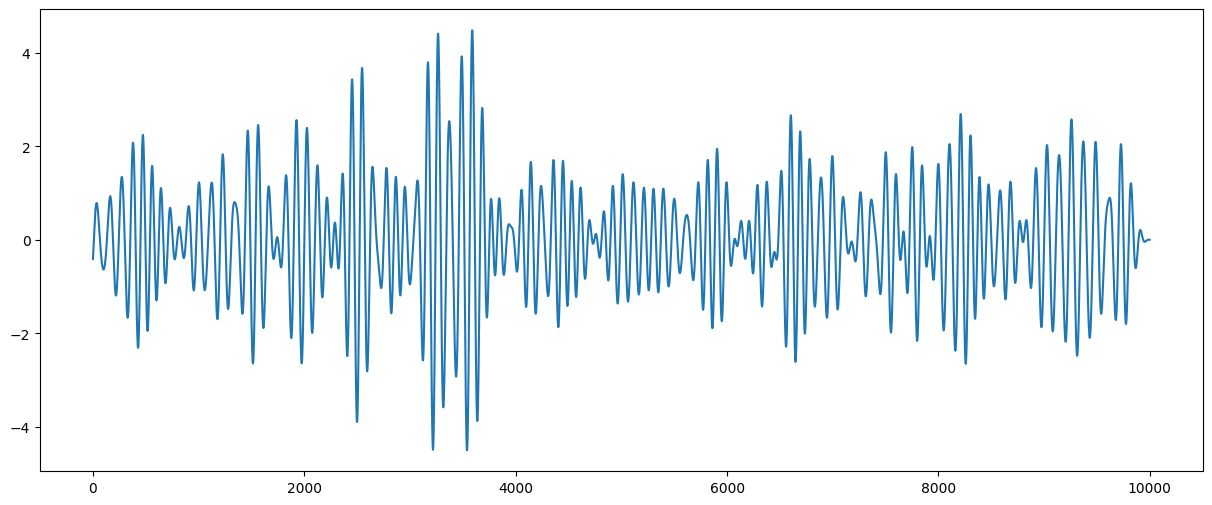

300


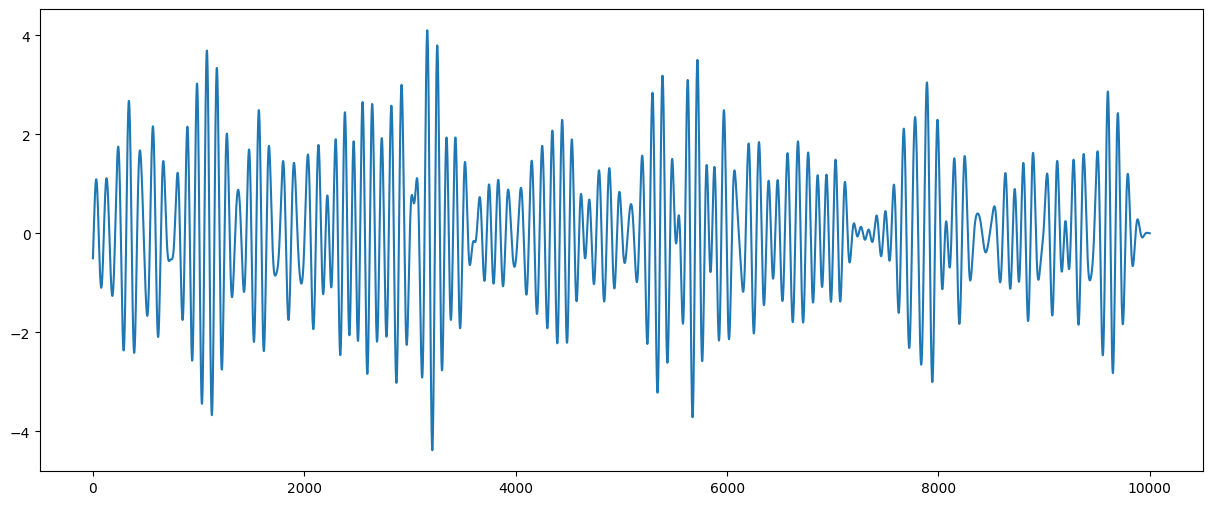

400


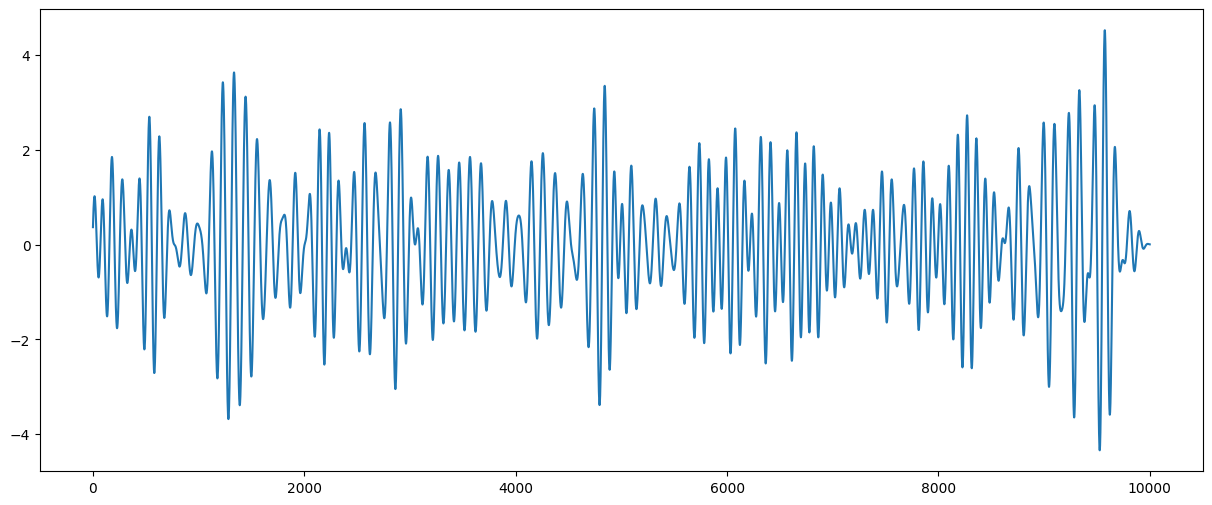

500


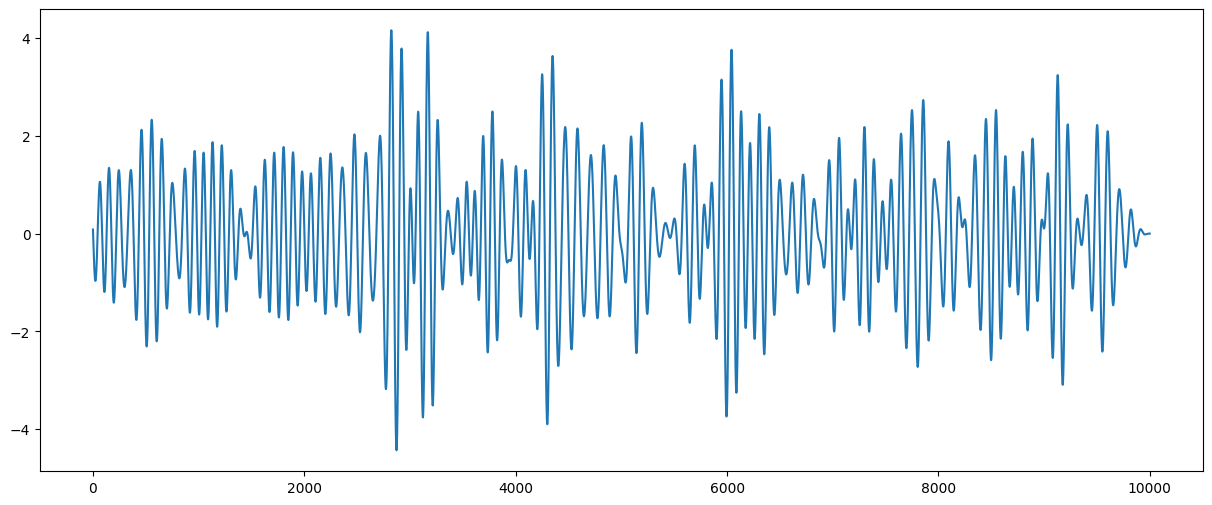

600


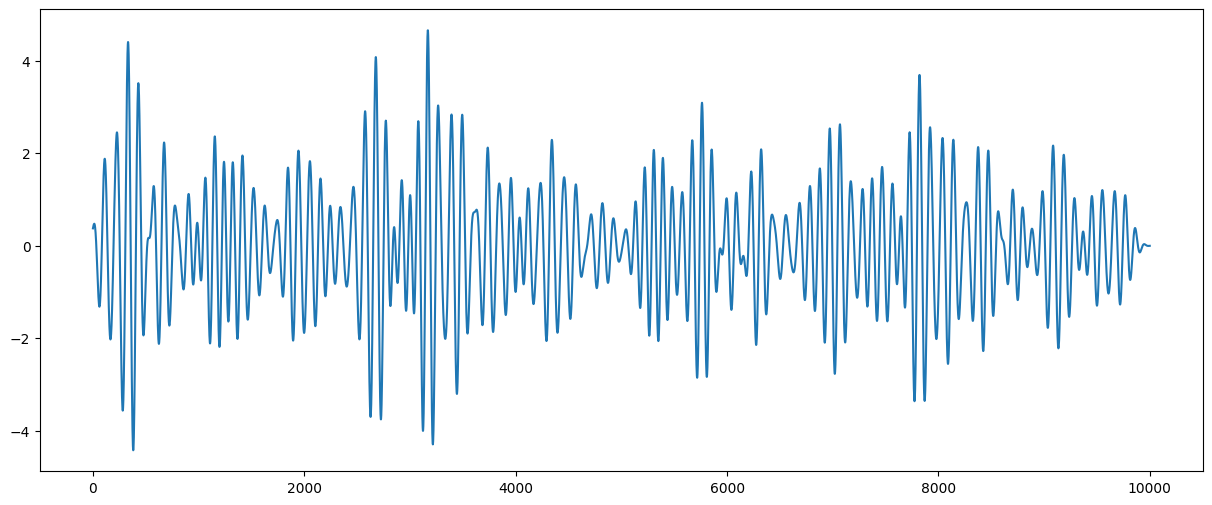

700


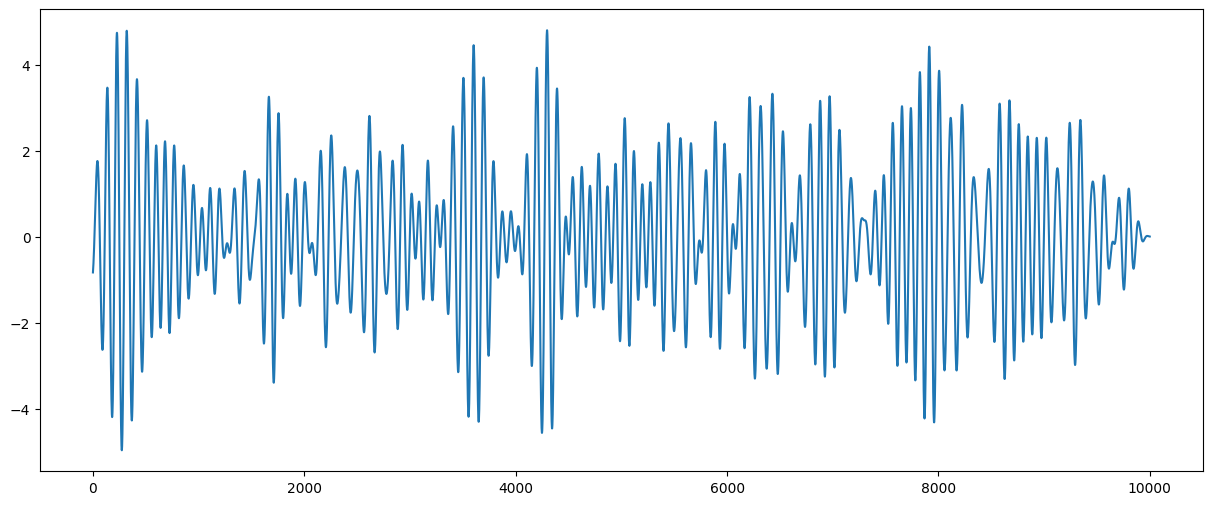

800


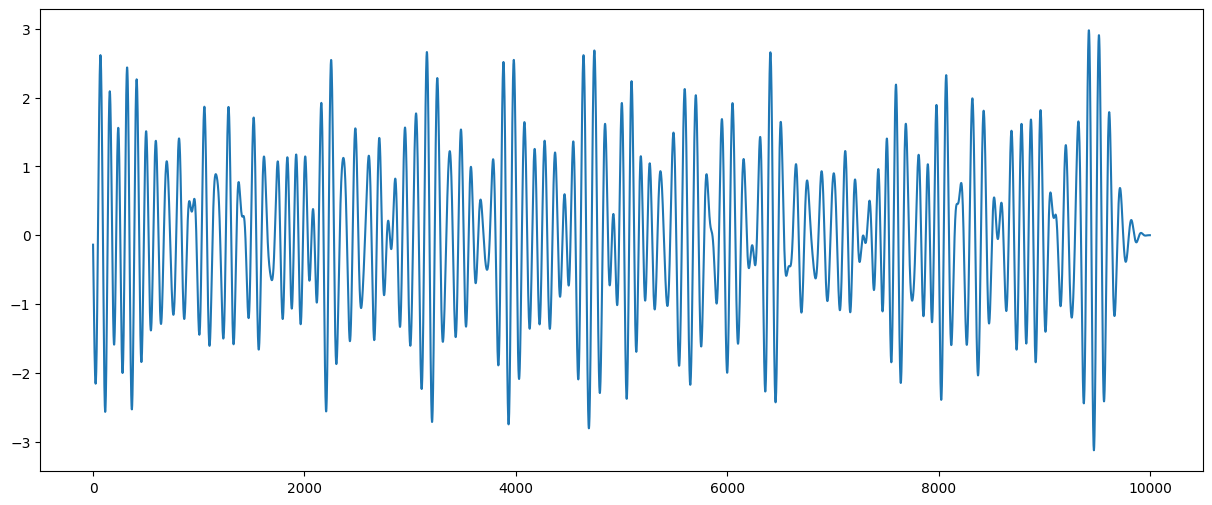

In [10]:
# plot scatter of one wave from data
print(waves["basic"].shape)
for i in range(0,900,100):
    print(i)
    plt.figure(figsize=(15,6))
    plt.plot( [*range(waves["basic"].shape[1])], waves["alpha"][i,:] )
    plt.show()
    #plt.xlim(2000,3000)

## <font color="blue"> Make Animation

[useful example](https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

In [6]:
data = waves["alpha"] 
print("mean: ", np.mean(data))
print("SD: ", np.std(data)) 

mean:  0.0012875858618273282
SD:  1.329234611494067


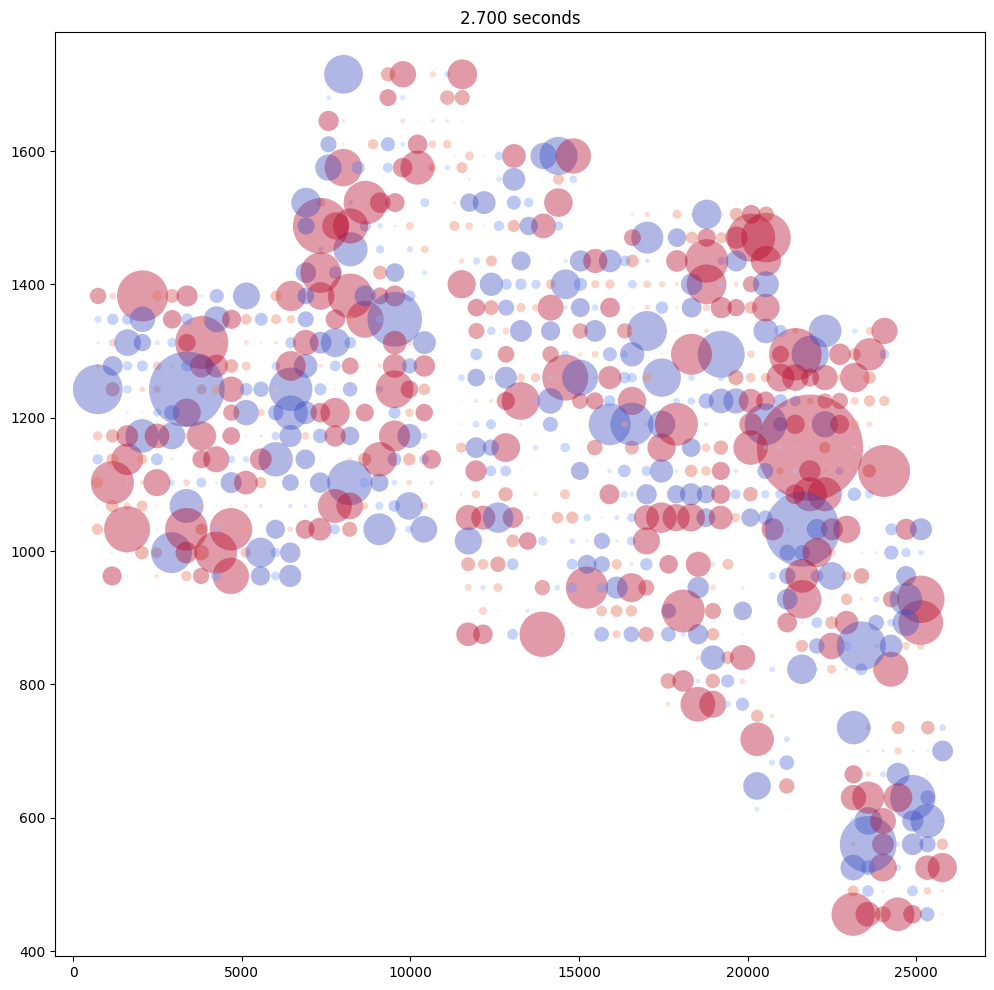

In [8]:
### Long Alpha Animation
# ca1_alpha_start2700_stop5700_step1
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(12,12) )
ax = plt.axes()
data = waves["alpha"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# animation function.  This is called sequentially
def animate(i):
    scatter.set_array(data[:,i])
    scatter._sizes = (np.abs(data[:,i])**2.3)*80
    ax.set_title(f"{i/1000:.3f} seconds")
    return scatter

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(2700, 5000, 3), interval=100, blit=False)  #5700


In [27]:
anim.save("checkit5.mp4")

In [6]:
list(range(0,20,1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [7]:
len(range(2500, 2800, 1)) * 100/ 1000

30.0

### <font color="green"> Saved Animations

These are animations I like

In [ ]:
### Theta Waves Animation ###
## ca1_theta_start2000_stop3000_step3
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure( figsize=(12,12) )
# ax = plt.axes()
# data = waves["theta"] 
# norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
# scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*100 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# # animation function.  This is called sequentially
# def animate(i):
#     scatter.set_array(data[:,i])
#     scatter._sizes = (np.abs(data[:,i])**1.8)*100
#     ax.set_title(f"{i/1000:.3f} seconds")
#     return scatter

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = FuncAnimation(fig, animate, frames=range(2000, 3000, 3), interval=100, blit=False)

In [ ]:
### Delta Waves Animation ###
## ca1_delta_start2000_stop3000_step3
# fig = plt.figure( figsize=(12,12) )
# ax = plt.axes()
# data = waves["delta"] 
# norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
# scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# # animation function.  This is called sequentially
# def animate(i):
#     scatter.set_array(data[:,i])
#     scatter._sizes = (np.abs(data[:,i])**1.8)*20
#     ax.set_title(f"{i/1000:.3f} seconds")
#     return scatter

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = FuncAnimation(fig, animate, frames=range(2000, 3000, 3), interval=100, blit=False)

In [ ]:
### Alpha Waves Animation ###
## ca1_alpha_start2500_stop2800_step1
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure( figsize=(12,12) )
# ax = plt.axes()
# data = waves["alpha"] 
# norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
# scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# # animation function.  This is called sequentially
# def animate(i):
#     scatter.set_array(data[:,i])
#     scatter._sizes = (np.abs(data[:,i])**2)*100
#     ax.set_title(f"{i/1000:.3f} seconds")
#     return scatter

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = FuncAnimation(fig, animate, frames=range(2000, 3000, 3), interval=100, blit=False)

In [ ]:
### Beta Waves Animation ###
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure( figsize=(12,12) )
# ax = plt.axes()
# data = waves["beta"] 
# norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
# scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# # animation function.  This is called sequentially
# def animate(i):
#     scatter.set_array(data[:,i])
#     scatter._sizes = (np.abs(data[:,i])**2)*90
#     ax.set_title(f"{i/1000:.3f} seconds")
#     return scatter

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = FuncAnimation(fig, animate, frames=range(2500, 2800, 1), interval=100, blit=False)

In [ ]:
### Long Alpha Animation
# ca1_alpha_start2700_stop5000_step1
# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure( figsize=(12,12) )
# ax = plt.axes()
# data = waves["alpha"] 
# norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
# scatter = ax.scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# # animation function.  This is called sequentially
# def animate(i):
#     scatter.set_array(data[:,i])
#     scatter._sizes = (np.abs(data[:,i])**2.3)*80
#     ax.set_title(f"{i/1000:.3f} seconds")
#     return scatter

# # call the animator.  blit=True means only re-draw the parts that have changed.
# anim = FuncAnimation(fig, animate, frames=range(2700, 5000, 3), interval=100, blit=False)  #5700

## <font color="brown">Multi-Plots


### Get Scatter

In [6]:
import random as rand

In [7]:
def plotFootprint( sd, neuron_id ):
    
    # Scatter plot of neurons
    plt.figure(figsize=(8, 8))
    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
    plt.scatter(neuron_y, neuron_x, alpha=0.10, c='grey')
        
    # Plot neuron geographic location
    for neighbor in  sd.neuron_data[0][neuron_id]['neighbor_positions']:
        plt.scatter( [neighbor[1]+rand.random()*13], [neighbor[0]+rand.random()*10], alpha=0.40, c='blue')
    
    plt.xlabel('um')
    plt.ylabel('um')
    plt.title("Directionality plot")
    plt.show()

/tmp/ipykernel_32769/2159437574.py:7: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():
/tmp/ipykernel_32769/2159437574.py:13: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neighbor in  sd.neuron_data[0][neuron_id]['neighbor_positions']:


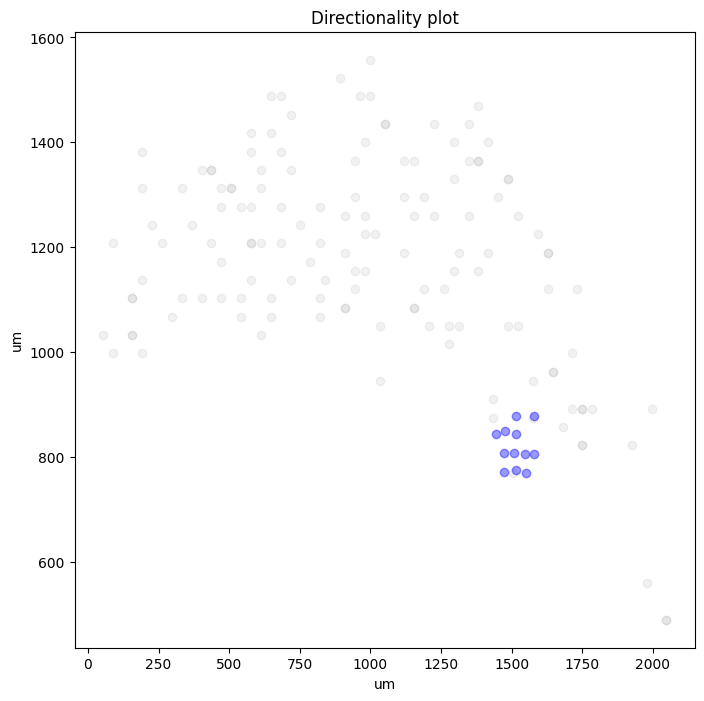

In [8]:
plotFootprint( sd, 0 )

### Create time sequence

In [19]:
sd.trai

<generator object merge at 0x7f4a253b4dd0>

/tmp/ipykernel_24437/2726478531.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  sd.neuron_data[0][0]


{'cluster_id': 0,
 'channel': 0,
 'position': (770.0, 1505.0),
 'amplitudes': [24.698925018310547,
  22.395610809326172,
  19.42011833190918,
  26.763961791992188,
  19.278779983520508,
  25.235591888427734,
  21.036766052246094,
  26.958547592163086,
  20.22342872619629,
  21.332565307617188,
  20.236835479736328,
  23.363849639892578,
  24.62937355041504,
  25.298574447631836,
  24.968503952026367,
  21.891164779663086,
  22.66792106628418,
  22.511791229248047,
  19.495357513427734,
  19.1392822265625,
  23.136859893798828,
  20.45022201538086,
  24.182636260986328,
  24.028135299682617,
  19.083162307739258,
  20.937353134155273,
  25.734371185302734,
  22.939176559448242,
  20.742177963256836,
  22.911893844604492,
  21.04637336730957,
  24.3459415435791,
  18.578739166259766,
  23.01606559753418,
  16.69774055480957,
  20.666006088256836,
  22.349868774414062,
  20.129724502563477,
  18.53731918334961,
  15.519327163696289,
  17.141605377197266,
  19.73779296875,
  21.73084831237

### Create multi plot

Do combine the raw wave plot with other plots to verify data

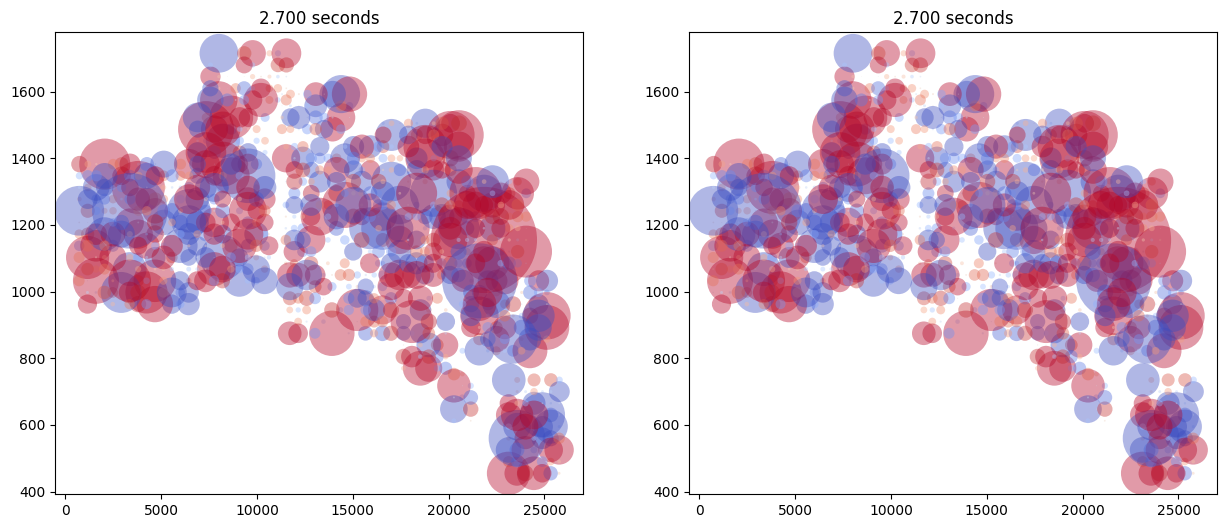

In [8]:
### Long Alpha Animation
# ca1_alpha_start2700_stop5700_step1
# First set up the figure, the axis, and the plot element we want to animate
fig, plots = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
#ax = plt.axes()

# Waves plot
data = waves["alpha"] 
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
plot0 = plots[0].scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# Raster Plot
plot1 = plots[1].scatter( x, y, c=data[:,0] , norm=norm, cmap=cm.coolwarm, s=(np.abs(data[:,0])**1.8)*10 ,  alpha=.4 , edgecolor='none' ) #c=data,  s=np.abs(data[:,0])*200,

# animation function.  This is called sequentially
def animate(i):
    # Waves plot
    plot0.set_array(data[:,i])
    plot0._sizes = (np.abs(data[:,i])**2.3)*80
    plots[0].set_title(f"{i/1000:.3f} seconds")

    # Raster Plot
    plot1.set_array(data[:,i])
    plot1._sizes = (np.abs(data[:,i])**2.3)*80
    plots[1].set_title(f"{i/1000:.3f} seconds")


    return plots

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, frames=range(2700, 3000, 3), interval=100, blit=False)  #5700

In [28]:
anim.save("checkit5.mp4")


In [13]:
len(range(2700, 3000, 1)) * 100/ 1000

30.0

### Make raster